# Q1. For $k$-Means $\text{OPT}_{\text{input}} \le 4 \times \text{OPT}_{\text{any}} $ 

#### Let $C$ be set of $k$ centers $ C = \set{{c_1, c_2, \ldots, c_k}} $.
#### The cost of the entire clustering is $ \text{cost(C)} = \underset{x}{\operatorname{\sum}} \underset{c_x}{\operatorname{\min}} $ $ d(x, c_x)^2 $, i.e the sum of the square of the **euclidean** distance of each point to its closest center. Hence, when referring to $\text{OPT}_{C}$ we refer to the cost of the optimal clustering with some set of centers $C$.
#### Let $\text{OPT}_{\text{input}}$ be the cost of the optimal clustering when centers are chosen among the datapoint.
#### Let $\text{OPT}_{\text{any}}$ be the cost of the optimal clustering when centers are chosen to be any point in the same space.
#### Let $\text{OPT}_{\text{any}}$ have centers $C = \set{c_1, c_2, \ldots, c_k}$, in every cluster $C_i$ with center $c_i$, let us choose the points $\hat{x_i}$ to be the centers of $\text{OPT}_{\text{input}}$, defined as the point within the cluster $C_i$ that is closest to the cluster center $c_i$, i.e 
#### $\hat{x_i} = \underset{x \in c_i}{\operatorname{\argmin}}$ $d(x, c_i)$ 
#### Then for the set of centers $\hat{C} = \set{\hat{x_1}, \hat{x_2}, \ldots, \hat{x_k}}$, we have that $\text{cost}(\hat{C}) \ge \text{OPT}_{\text{input}}$. 
#### So we just need to show that $\text{cost}(\hat{C}) \le 4 \times \text{cost}(C) = 4 \times \text{OPT}_{\text{any}}$ 
### Proof: 
#### Let $x_i \in C_i$, then by the definition of $\hat{x_i}$, we have that $d(\hat{x_i} | c_i) \le d(x_i | c_i)$ 
#### $\implies d(\hat{x_i} | x_i) \le d(\hat{x_i} | c_i) + d(x_i | c_i) \le 2 \times d(x_i | c_i)$ ($\because$ Triangle Inequality) 
#### $\implies d(\hat{x_i} | x_i)^2 \le 4 \times d(x_i | c_i)^2$ 
#### Sum this over all $x_i \in C_i$ 
#### $\underset{x \in c_i}{\operatorname{\sum}} d(\hat{x_i} | x_i)^2 \le 4 \times \underset{x \in c_i}{\operatorname{\sum}} d(x_i | c_i)^2$ 
#### $\implies \text{cost}(C_i, \hat{x_i}) \le 4 \times \text{cost}(C_i, c_i)$ 
#### Sum this over all clusters $C_i$ 
#### $\underset{i}{\operatorname{\sum}} \text{cost}(C_i, \hat{x_i}) \le 4 \times \underset{i}{\operatorname{\sum}} \text{cost}(C_i, c_i)$ 
#### $\implies \text{cost}(\hat{C}) \le 4 \times \text{cost}(C) = 4 \times \text{OPT}_{\text{any}}$ 
#### Hence, Proved.

#### $\therefore \text{OPT}_{\text{input}} \le \text{cost}(\hat{C}) \le 4 \times \text{OPT}_{\text{any}}$

# Q2. Markov's Inequality for a non-negative random variable $X$

#### $\mathbb{P}(X \ge k) \le \dfrac{\mathbb{E}(X)}{k}$

#### Proof:
$\mathbb{P}(X \ge k) = \int_a^{\infty}xf_{X}(x) dx$ <br>
$\mathbb{E}(X) = \int_0^{\infty}xf_{X}(x) dx = \int_0^axf_{X}(x) dx + \int_a^{\infty}xf_{X}(x)dx \ge \int_a^{\infty}xf_{X}(x)dx \ge \int_a^{\infty}af_{X}(x)dx \ge a\int_a^{\infty}f_{X}(x)dx = \mathbb{P}(X \ge a)$ <br>
$\therefore \mathbb{E}(X) \ge a . \mathbb{P}(X \ge a)$
<br> <br>
Notice that for the proof above, the equality would hold if for $x = 0$ to $a$, the random variable $X$ is $0$ and for $x = a$ to $\infty$ the random variable $X$ is $a$. Such a random variable could be a discrete random variable that takes the value $0$ with probability $1 - \dfrac{1}{a}$ and takes the value $a$ with probability $\dfrac{1}{a}$. <br>

Here the expectation $\mathbb{E}(X) = 0 . (1 - \dfrac{1}{a}) + 1 . (\dfrac{1}{a}) = \dfrac{1}{a}$. Here the probability $\mathbb{P}(X \ge 1) = \dfrac{1}{a} = \mathbb{P}(X = 1) = \dfrac{\mathbb{E}(X)}{1}$ and the inequality becomes an equality.

#### Intuition behind going for Chebyshev's Inequality and Chernoff Bounds:
Having the Markov's inequality "**tight**" simply means that in general given **just** the $\mathbb{E}(X)$, this is the best probability bound that one can provide. But if we have more information about the random variable $X$, then we can give a better bound. For example, if we know the variance $\mathrm{Var}(X)$ of the random variable $X$, then we can give a better bound using Chebyshev's Inequality.

# Q3. K-Means, K-Center, Single Linkage Agglomeration on Test Dataset $10,000$ datapoints in $\mathbb{R}^{784}$

## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from latex import latexify, format_axes
from os.path import join
import struct
from array import array
import random
from sklearn.metrics import rand_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
latexify(columns = 2)

## MNIST Data Class Loader from Kaggle

In [5]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)

### Loading the Training-Testing Images and Labels

In [6]:
input_path = './archive'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

### Helper Function to show list of images with their labels

In [7]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30, 20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap = "inferno")
        if (title_text != ''):
            plt.title(title_text, fontsize = 20);        
        index += 1

## Loading the MNIST Dataset

In [8]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

### Shape of the Training-Testing Data

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Some of the Digits

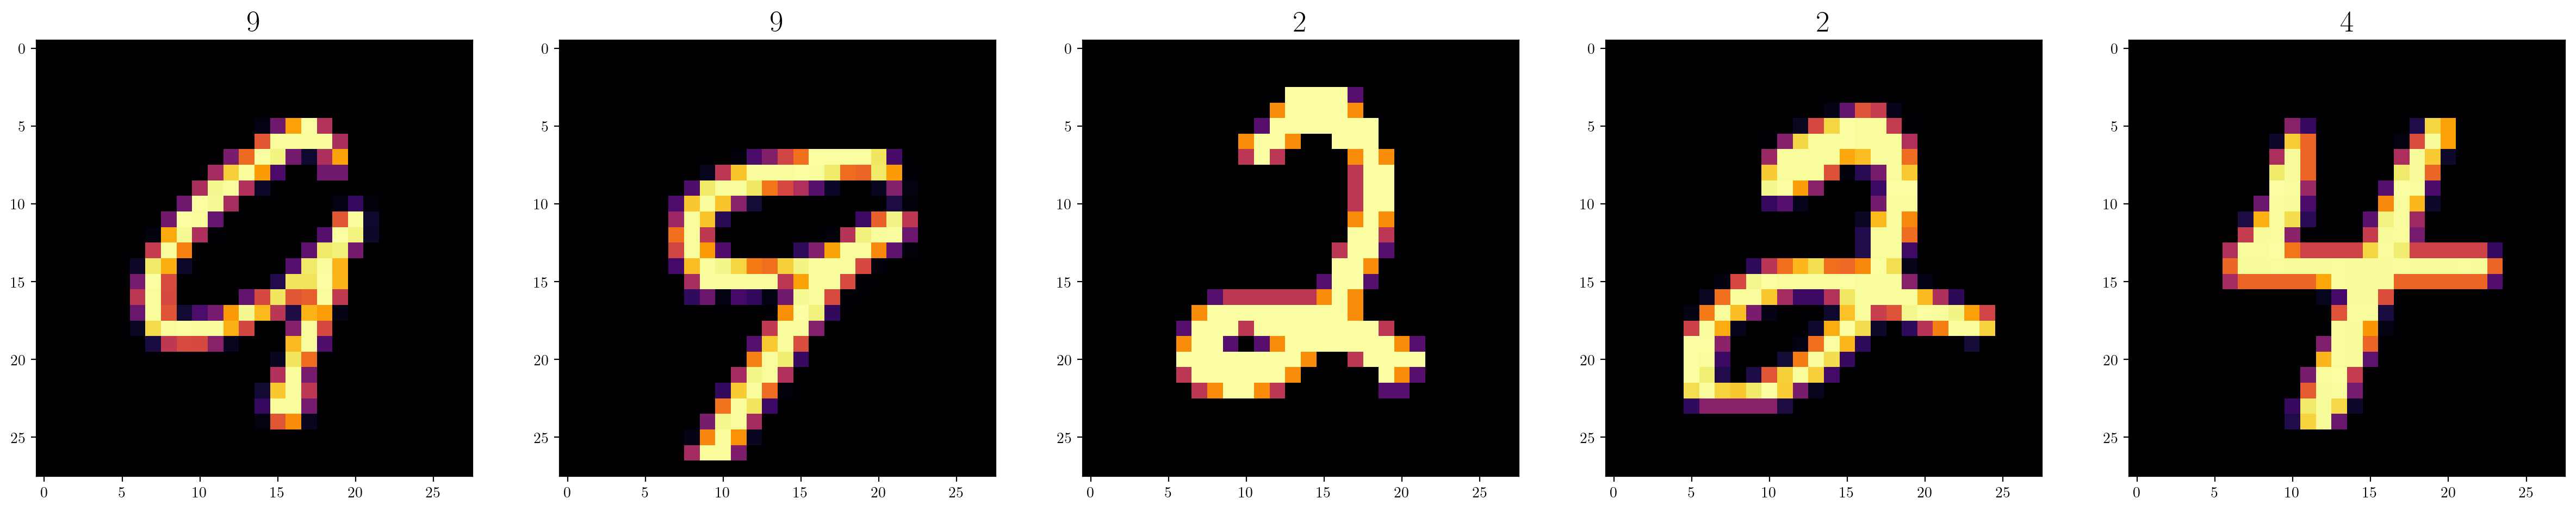

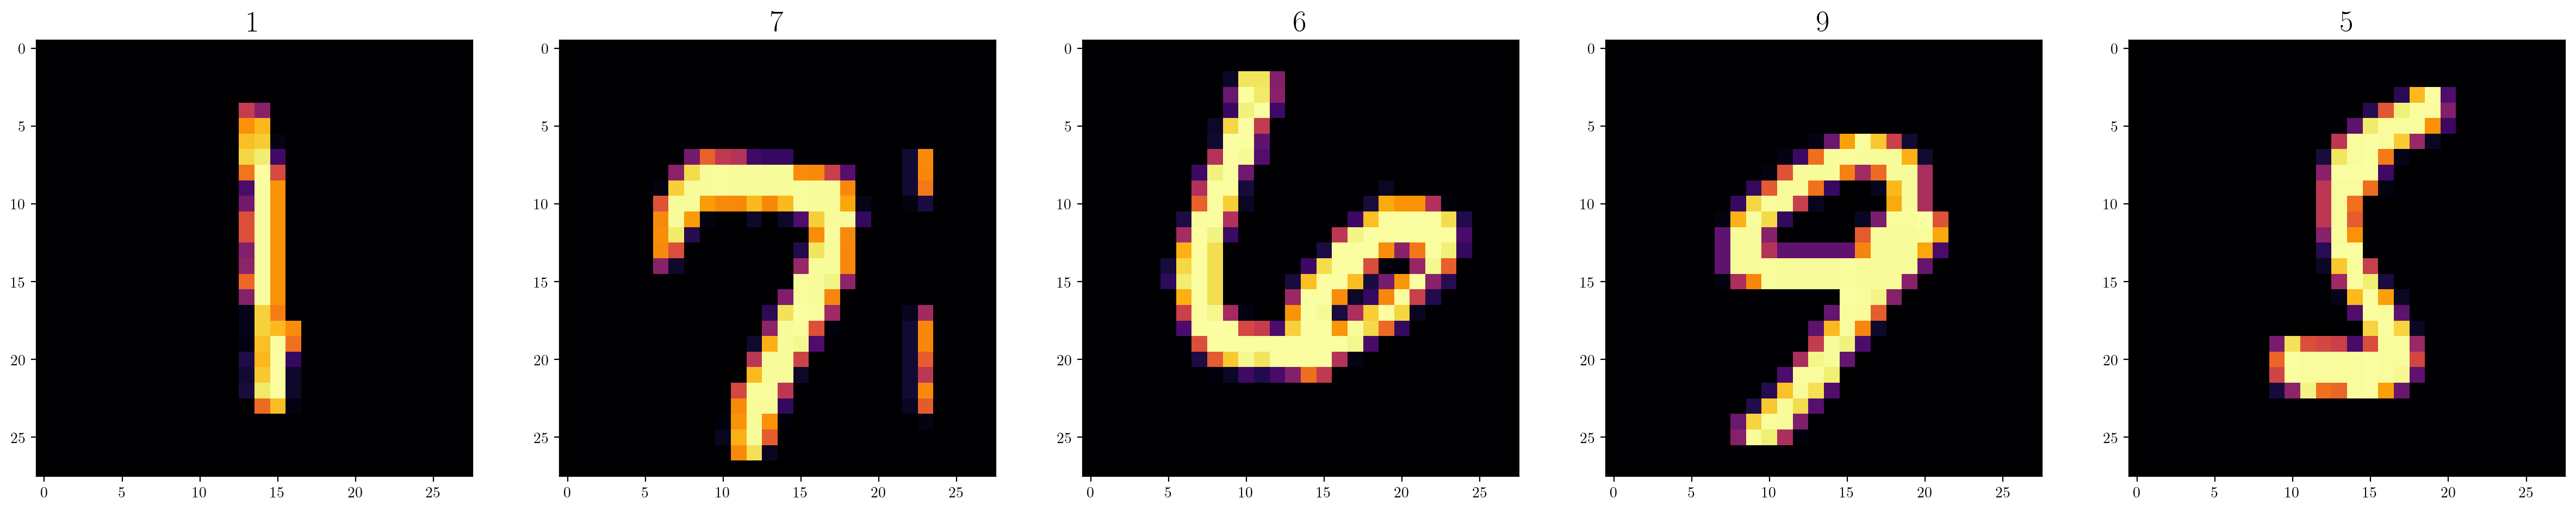

In [11]:
rand_idx = np.random.choice(10000, 5, replace = False)
show_images(x_train[rand_idx], y_train[rand_idx])
show_images(x_test[rand_idx], y_test[rand_idx])

### Random Images displayed

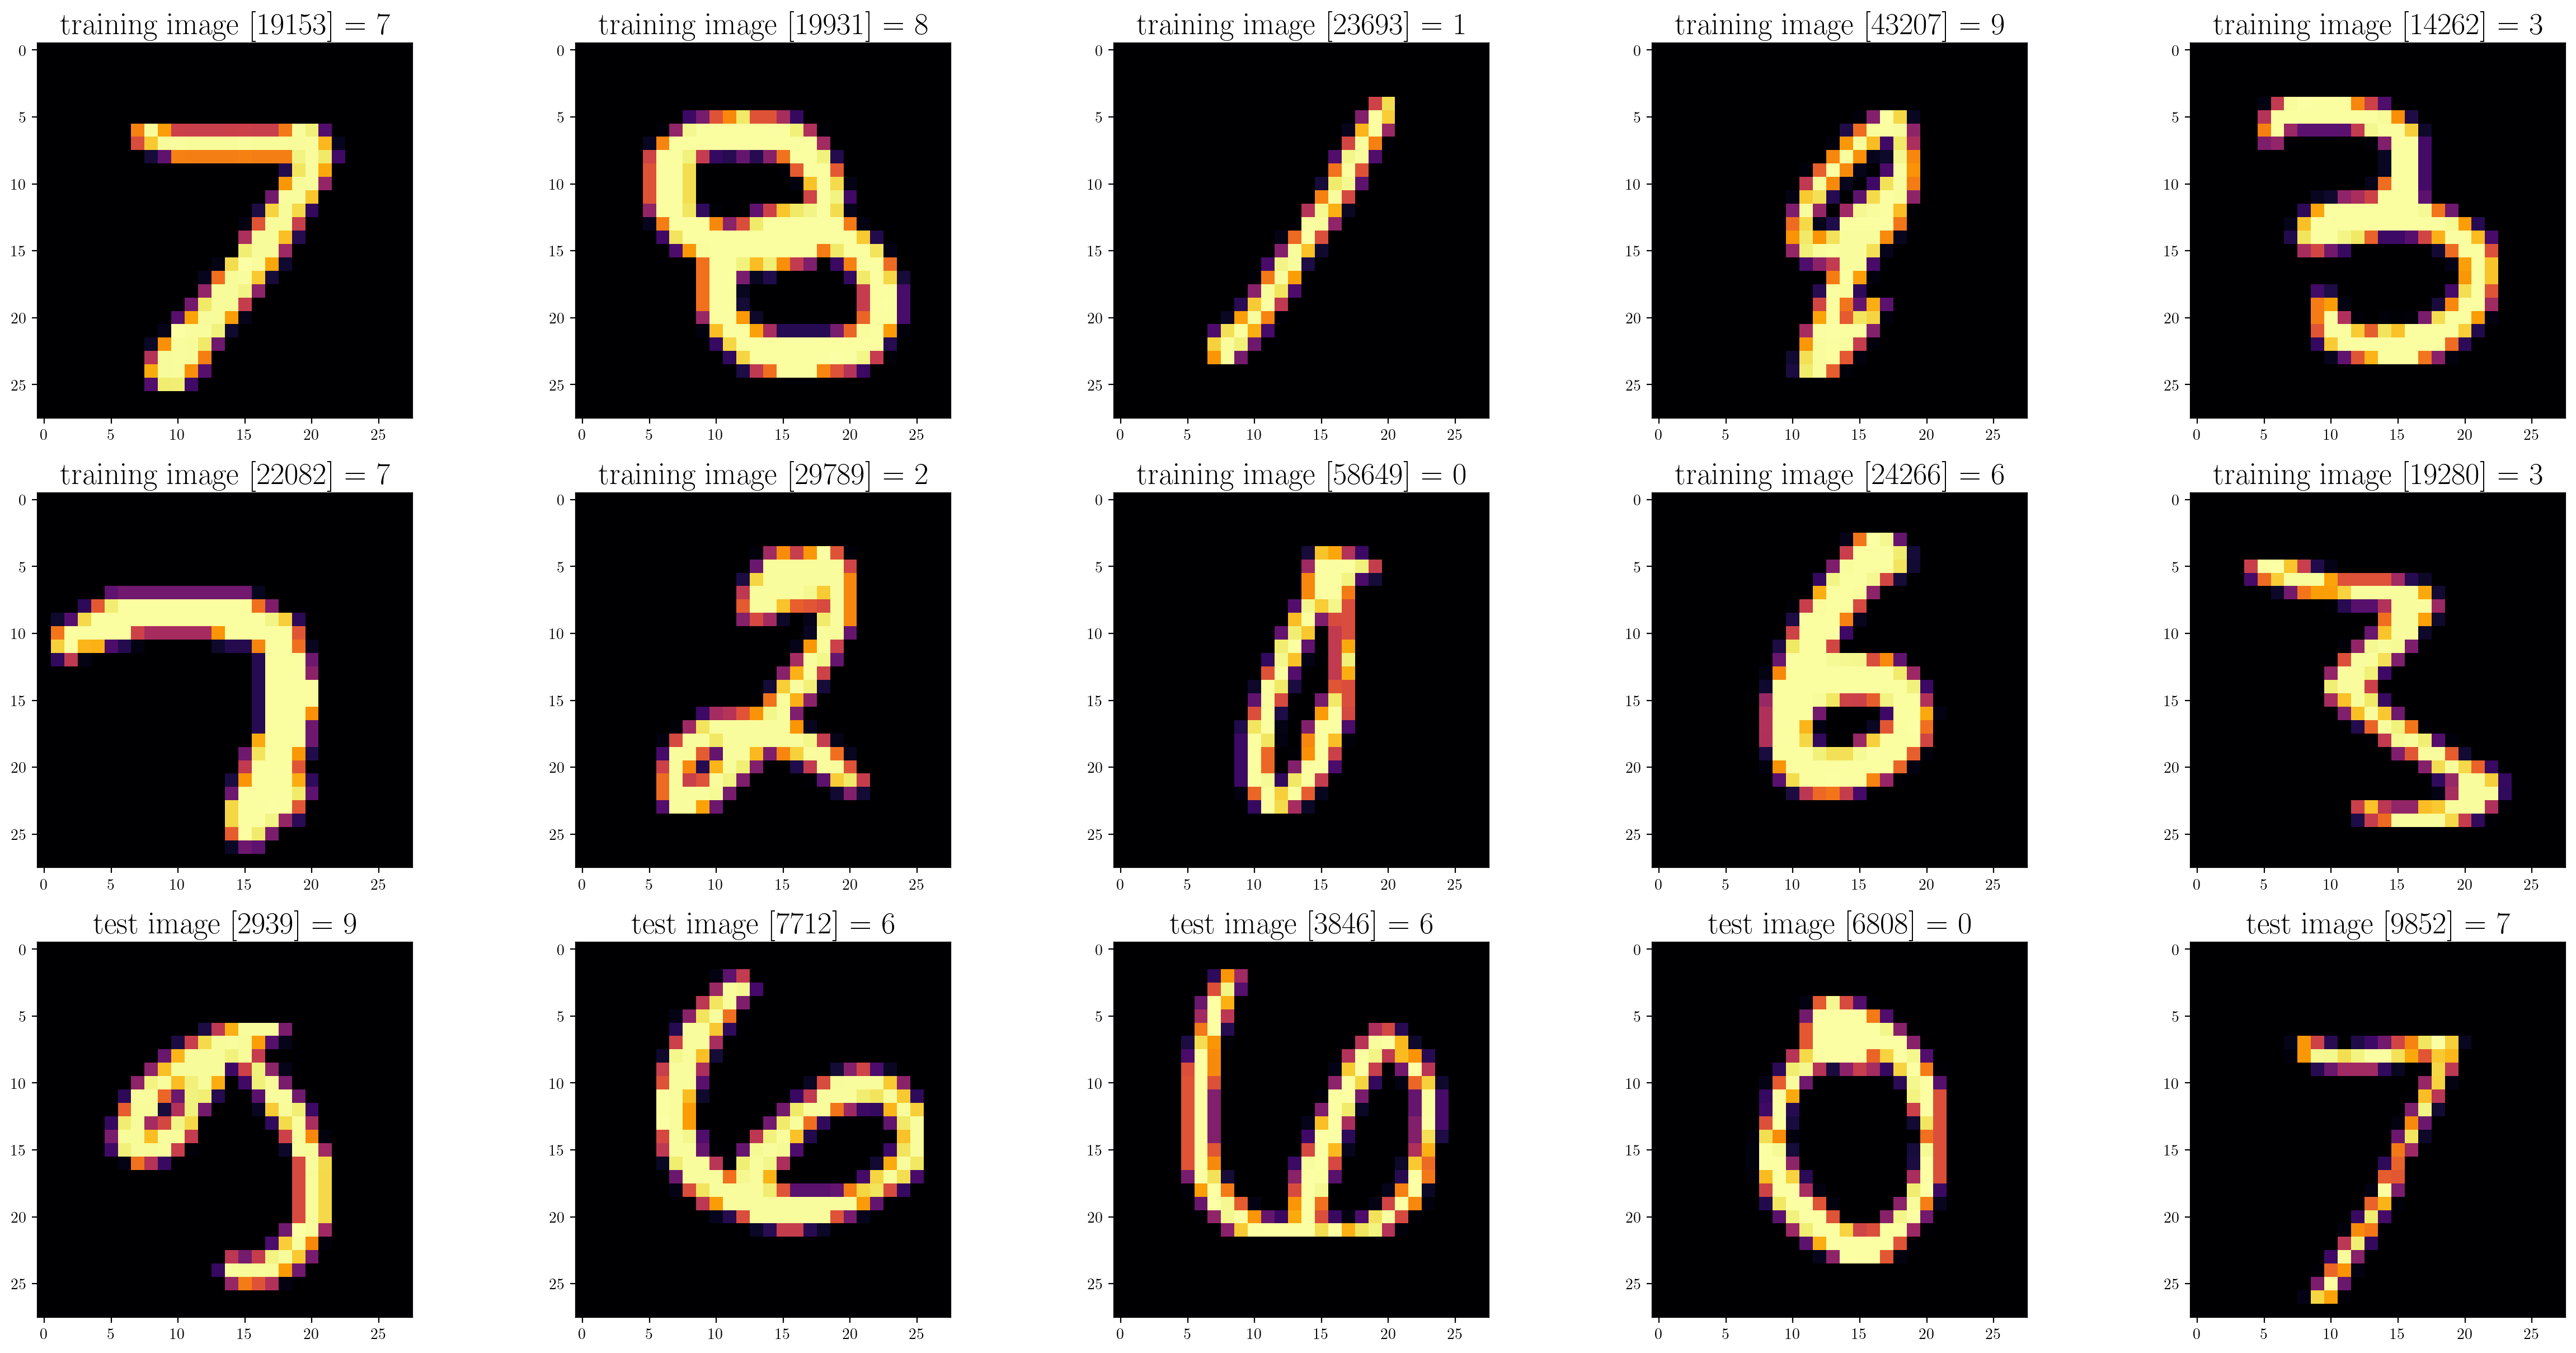

In [12]:
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [13]:
x_test.shape

(10000, 28, 28)

In [10]:
def flatten_out(data):
    return data.reshape(data.shape[0], -1)

In [15]:
x_test_flatten = flatten_out(x_test)
x_test_flatten.shape

(10000, 784)

## K-Means using Llyod's Algorithm with KMeans++ initialization

### The Algorithm
#### For a given partition:
- Find the centers of the current partition
- Assign points to the nearest center
- Recalculate the centers
- Terminate when centers don't shift much or no point changes the partition
  
#### The cost function:
#### $\text{cost(C)} = \underset{x}{\operatorname{\sum}} \underset{c_x}{\operatorname{\min}}$ $d(x, c_x)^2$
#### Objective is to minimise the variance of each cluster, the variance
#### $\text{var}(C_i) = \underset{x \in C_i}{\operatorname{\sum}} ||x - C_i||^2$
#### which is minimised at the **mean** of each cluster
#### $\overline{C_i} = \frac{1}{|C_i|} \underset{x \in C_i}{\operatorname{\sum}} x$

### KMeans++ Initialization
- Choose the initial point randomly
- For each remaining points $x$, compute $D(x)$, the distance between $x$ and the nearest center already chosen.
- Choose a new point as center with probability $\frac{D(x)^{\alpha}}{\sum D(y)^{\alpha}}$, where $\alpha = 2$ untill $k$ centers have been chosen.
- This is done by creating a CDF $F_X(x)$ for the above probability distribution at each iteration of $k$ runs. A uniform random variable $U$ when substituted into the invervse of CDF of $X$, returns the random drawn $x$ i.e. $x = F_X^{-1}(U)$
- To achieve this for our discrete CDF, we'll generate a uniform sample using ```np.random.rand()``` and find the closest value to it in the discrete CDF and extract the index of the corresponding point, following is the code snippet for it:

```python
    dist = np.min(np.linalg.norm(X[:, None] - centroids, axis = -1)[:, :i], axis = 1)
    probs = dist**2 / np.sum(dist**2)
    cdf = np.cumsum(probs)
    r = np.random.rand()
    my_idx = np.argmin(np.abs(cdf - r))
``` 

- Else we may use ```np.random.choice(A, p = ProbabilityDistribution)``` by explicitly providing the probability distribution of sampling

In [88]:
class KMeansPP:
    def __init__(self, n_clusters, max_iter = 300, tol = 1e-4):
        self.k = n_clusters
        self.iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None
    
    def fit(self, X):
        """
            Choosing the new center based upon the probability distribution
            probab_dist = distances_from_their_centers ** alpha / np.sum(distances_from_their_centers ** alpha)
        """
        alpha = 2
        self.centroids = np.zeros((self.k, X.shape[1]))
        self.centroids[0] = X[np.random.randint(X.shape[0])]
        for i in range(1, self.k):
            dist = np.min(np.linalg.norm(X[:, None] - self.centroids, axis = -1)[:, :i], axis = 1)
            probs = dist**alpha / np.sum(dist**alpha)
            self.centroids[i] = X[np.random.choice(X.shape[0], p = probs)]
        
        """
            Now k centers are chosen, so we need to 
            run the iterations of Llyod's Algorithm
        """
        iter = 0
        while (iter <= self.iter or np.sum(np.linalg.norm(self.centroids - prev_centroids)) >= self.tol):
            distances = np.linalg.norm(X[:, None] - self.centroids, axis = -1)
            self.labels = np.argmin(distances, axis = 1)
            prev_centroids = self.centroids.copy()
            self.centroids = np.array([X[self.labels == i].mean(axis = 0) for i in range(self.k)])
            iter += 1
    
    def predict(self, X_):
        return np.argmin(np.linalg.norm(X_[:, None] - self.centroids, axis = -1), axis = 1)
        

In [165]:
k = 10
model = KMeansPP(n_clusters = k, max_iter = 20, tol = 1e-4)
model.fit(flatten_out(x_test))

### Obtained $k$ Centers from the KMeans++ initialization in only $20$ iterations

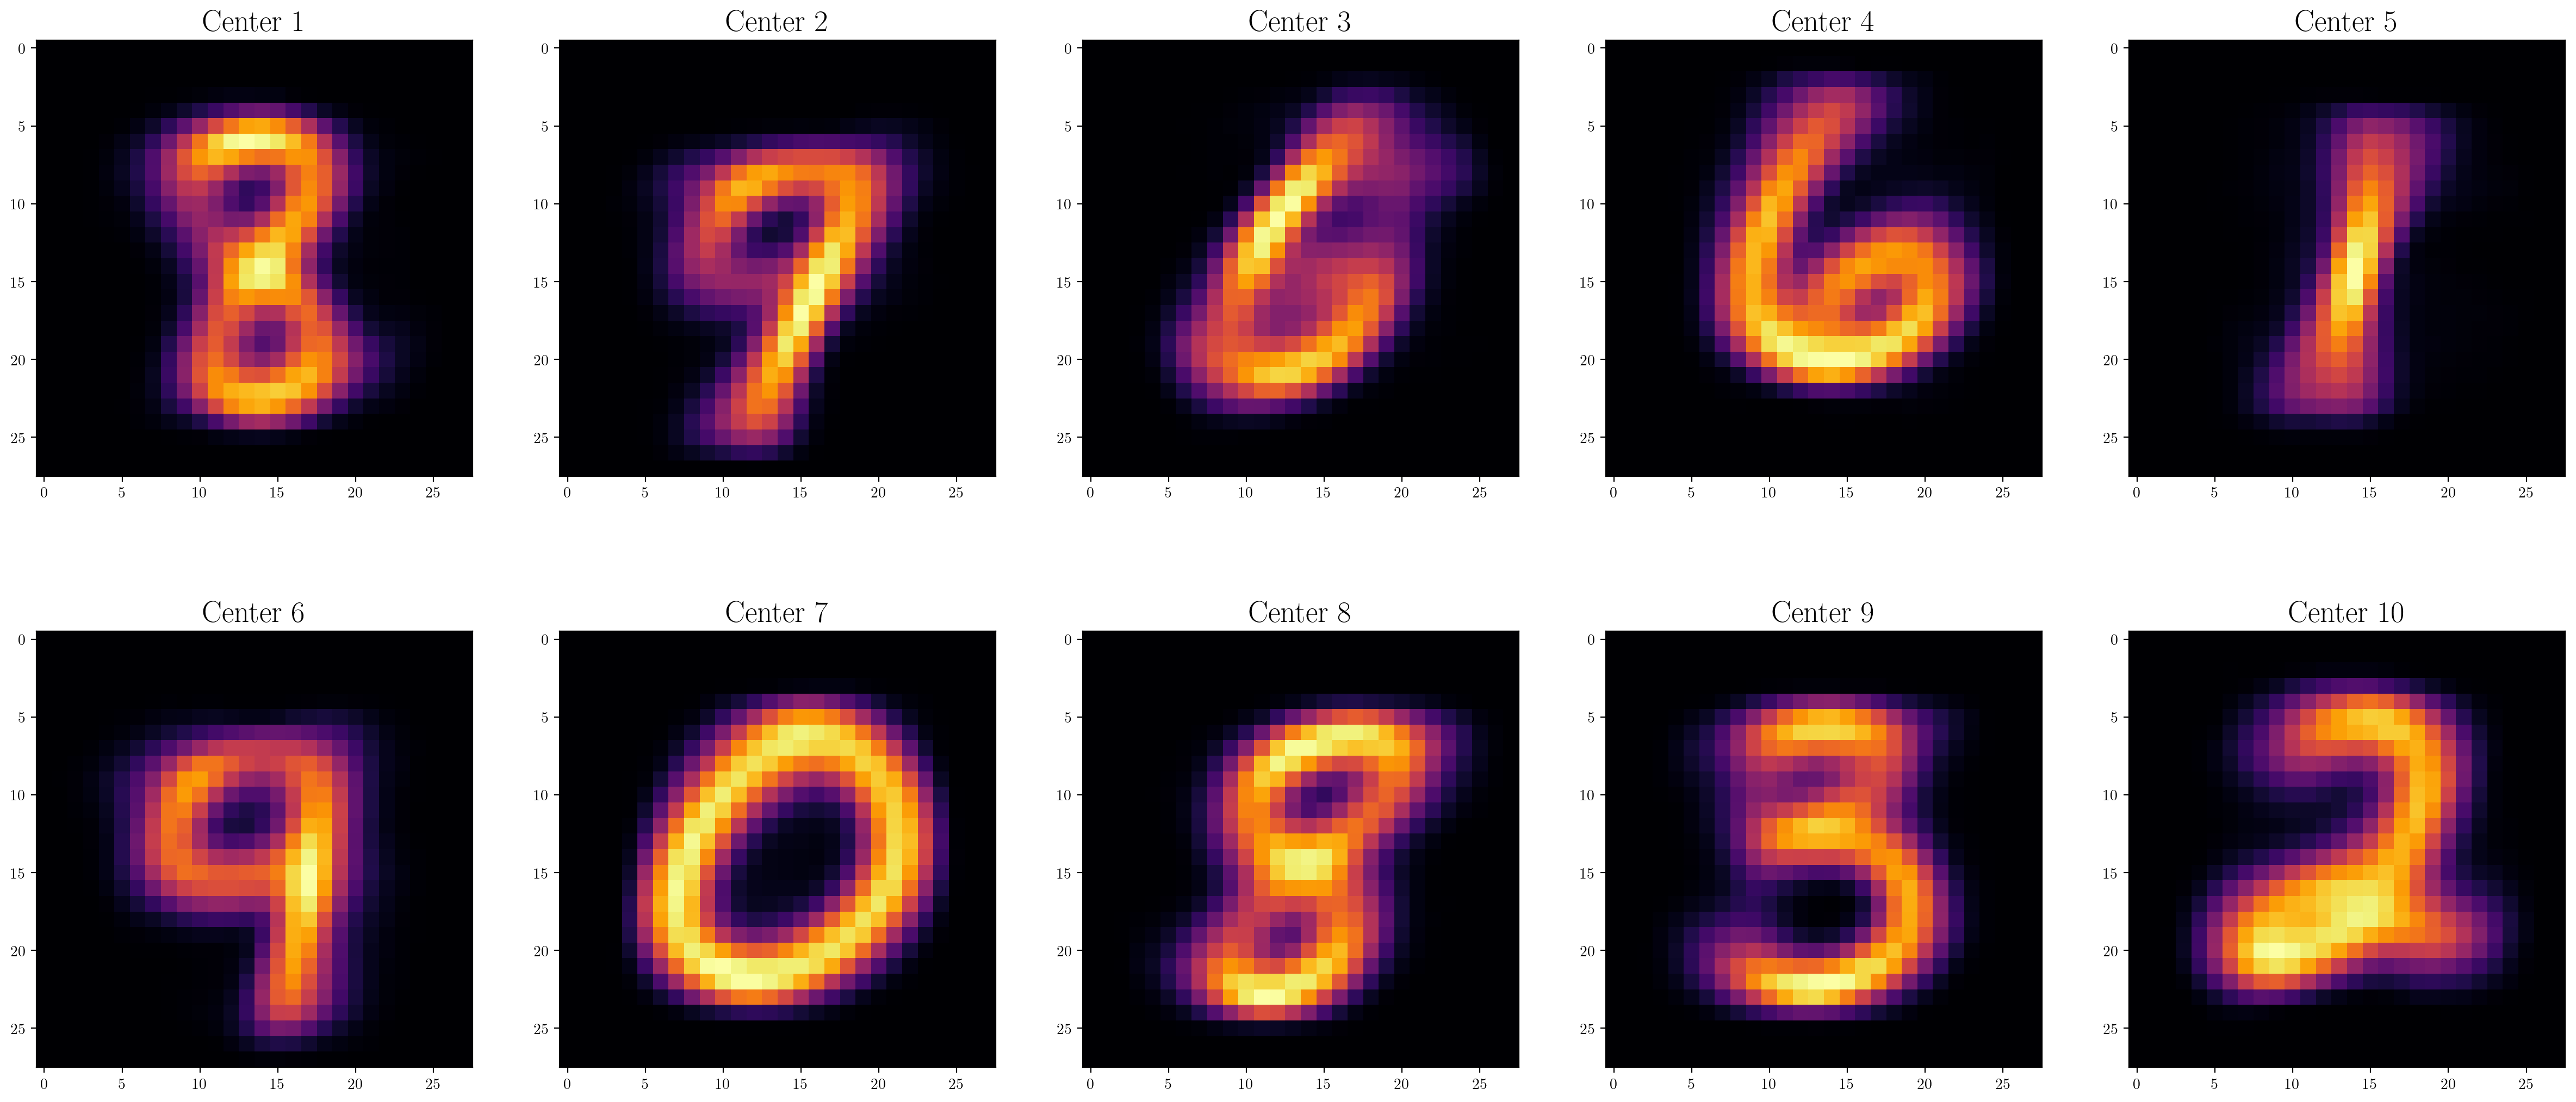

In [166]:
centersPlot = model.centroids.reshape((k, 28, 28))
show_images(centersPlot, [f"Center {i}" for i in range(1, 11)])

In [167]:
pred_labels = model.labels
print(pred_labels)
print(y_test)

[1 2 4 ... 1 2 3]
[7 2 1 ... 4 5 6]


In [168]:
rand_score(pred_labels, y_test)

0.8884620462046204

## K-Center Greedy Algo

### The Algorithm
- Choose first center arbitrarily
- For each of the remaining $(k - 1)$ centers, choose the furthest point from the chosen centers untill all $k$ centers have been found
  
### How to choose the further point from the choosen centers?
#### Let $G_i = \set{g_1, g_2, \ldots, g_i}$ be the set of $i$ chosen centers, then we define $d(x, G_i)$ as: <br>
#### $ d(x, G_i) = \underset{g \in G_i}{\operatorname{min}}$ $d(x, g) $
#### And the new center $g_{i + 1}$ as:
#### $g_{i + 1} = \underset{x}{\operatorname{argmax}}$ $d(x, G_i)$
#### Further we define maximum value of distance as $\Delta_{i} = \underset{x}{\operatorname{max}}$ $d(x, G_i)$
#### that is, from the distances of a point $x$ from each of the $i$ centers, pickout the minimum distance (denoted by $ d(x, G_i)$) from the $i$ centers and for all $x$ in the dataset, choose the point with the maximum of these minimum distance (denoted by $g_{i + 1}$ )
#### The cost of entire clustering $D_{\text{algo}}$ also denoted as $\Delta(G)$, is the maximum of the further distances of points from their respective centers. This means that we may place a ball of radius $\Delta(G)$ over each of the $k$ centers and we'll be able to cover all points

In [89]:
class KCenter:
    def __init__(self, k = 10):
        self.k = k
        self.centers = None
        self.labels = None
    
    def fit(self, X):
        self.centers = np.zeros((self.k, X.shape[1]))
        self.centers[0] = X[np.random.randint(X.shape[0])]
        distances = np.zeros((X.shape[0], self.k))
        for i in range(1, self.k):
            for j in range(i):
                distances[:, j] = np.linalg.norm(X - self.centers[j], axis = 1)
            self.centers[i] = X[np.argmax(np.min(distances[:, :i], axis = 1))]
        self.labels = np.argmin(np.linalg.norm(X - self.centers[:, None], axis = 2), axis = 0)

    def predict(self, X_train):
        return np.argmin(np.linalg.norm(X_train - self.centers[:, None], axis = 2), axis = 0)

In [86]:
k = 10
model = KCenter(k = k)
model.fit(flatten_out(x_test))

### Obtained $k$ Centers from the KCenter Algorithm

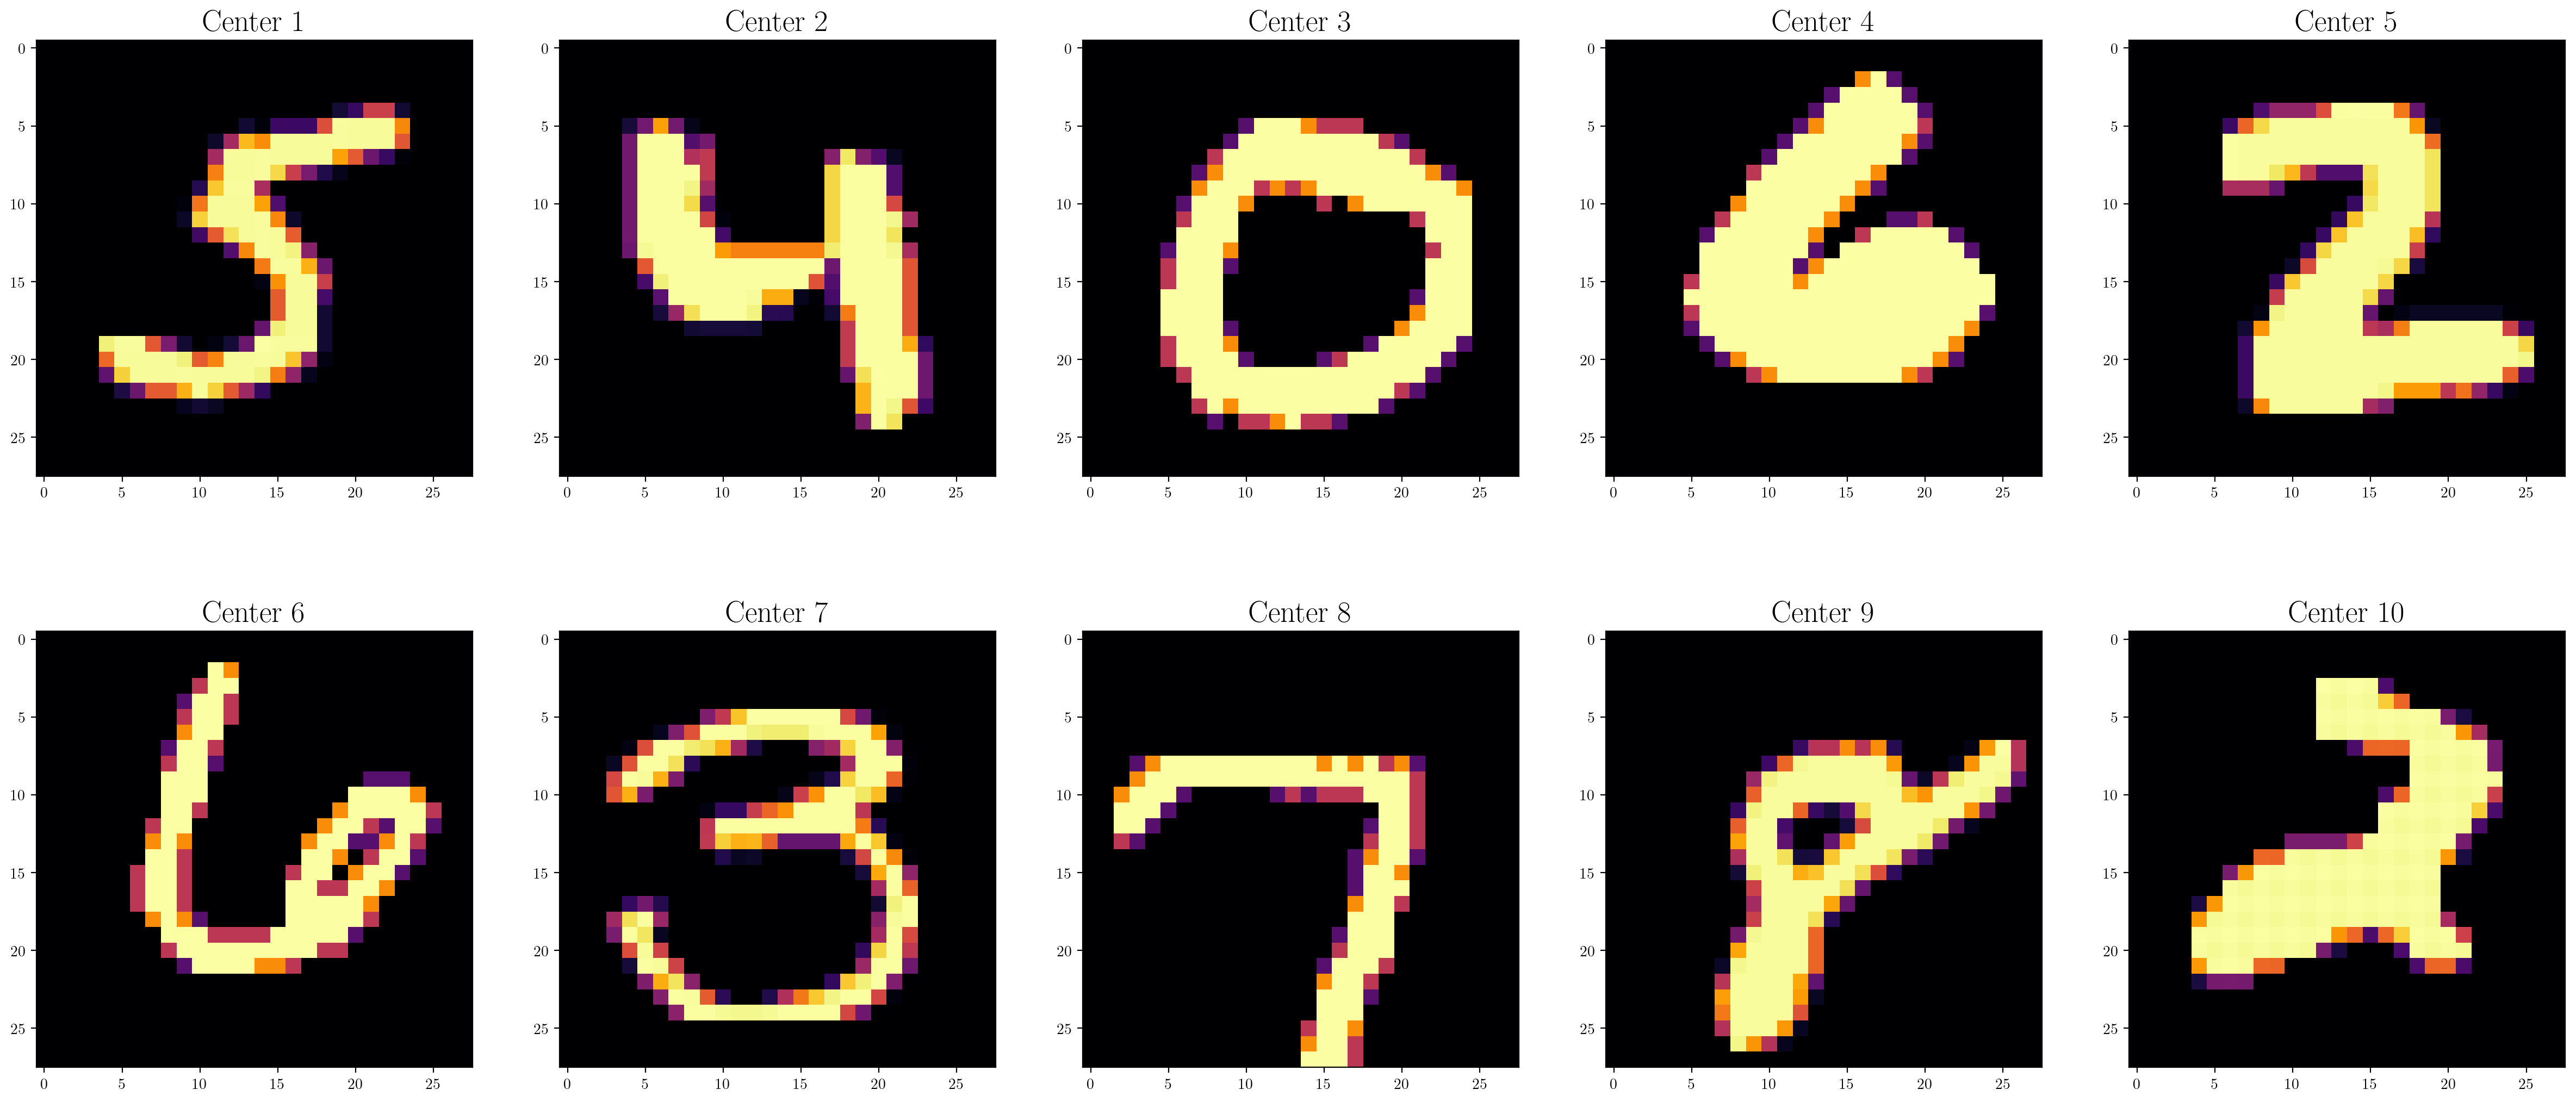

In [87]:
centersPlot = model.centers.reshape((k, 28, 28))
show_images(centersPlot, [f"Center {i}" for i in range(1, 11)])

In [88]:
pred_labels = model.labels
print(pred_labels)
print(y_test)

[7 4 0 ... 8 0 3]
[7 2 1 ... 4 5 6]


In [92]:
rand_score(pred_labels, y_test)

0.6772203820382038

## Single Linkage Agglomeration

### Closeness Metric is the **closest pair distance**
#### $D(C_1, C_2) = \underset{x \in C_1, y \in C_2}{\operatorname{\min}} d(x, y)$
#### $O(N^3)$

In [232]:
from scipy.spatial.distance import squareform, pdist
from IPython.display import clear_output
import time

class SingleLinkageAgglomeration:
    def __init__(self, n_clusters = 10):
        self.k = n_clusters
        self.clusters = None
        self.labels = None
        self.point_clusters = []
        
    def fit(self, X):
        self.clusters = [[i] for i in range(X.shape[0])]
        while (len(self.clusters) > self.k):
            if (len(self.clusters) == X.shape[0]):
                D = squareform(pdist(X, metric = "euclidean"))
            
            # clear_output(wait = True)
            # print(D.shape)
            
            # print(self.clusters)
            # l = 0
            # for cluster in self.clusters:
            #     l += len(cluster)
            # print(l)
            
            D_argmin = D.copy()
            np.fill_diagonal(D_argmin, np.inf)
            D_argmin[np.triu_indices(D.shape[0])] = np.inf


            row, col = np.unravel_index(np.argmin(D_argmin), D.shape)
            merged_column = np.minimum(D[:, row], D[:, col])

            merged_column = np.delete(merged_column, row)
            # print(row, col)
            row, col = sorted([row, col])
            
            

            deleted_D = np.delete(np.delete(D, col, axis = 1), col, axis = 0)
            deleted_D[row] = merged_column
            deleted_D[:, row] = merged_column
            
            """
                [[0], [1], [2], [3], [4]]
                with [row, col] = [0, 2]
                will become
                [[0, 2], [1], [3], [4]]
                
                Further with [row, col] = [0, 2]
                will become
                [[0, 2, 3], [1], [4]]
            
            """
            # print()
            
            
            self.clusters[row].extend(self.clusters[col])
            self.clusters.pop(col)
            D = deleted_D.copy()
            
            # time.sleep(0.00001)
            
        self.labels = np.zeros(X.shape[0])
        for cluster_idx, cluster in enumerate(self.clusters):
            self.labels[cluster] = int(cluster_idx)
        
        for i in range(self.k):
            self.point_clusters.append(X[self.labels == i])
        
        
    def predict(self, X):
        predictions = np.zeros(X.shape[0])

        for i, x in enumerate(X):
            distances_to_clusters = np.zeros(self.k)
            
            for cluster_idx, cluster_points in enumerate(self.point_clusters):
                distances_to_clusters[cluster_idx] = np.min(np.linalg.norm(cluster_points - x, axis = 1))
            
            predictions[i] = np.argmin(distances_to_clusters)

        return predictions

#### Model Fitting for the random $30$ points showing the merging of clusters along with the merge indices

In [228]:
k = 10
model = SingleLinkageAgglomeration(n_clusters = k)
rand_idx = np.random.choice(10000, 30, replace = False)
X = flatten_out(x_test)[rand_idx]
model.fit(X)

(30, 30)
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29]]
30
29 19

(29, 29)
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19, 29], [20], [21], [22], [23], [24], [25], [26], [27], [28]]
30
18 14

(28, 28)
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14, 18], [15], [16], [17], [19, 29], [20], [21], [22], [23], [24], [25], [26], [27], [28]]
30
12 4

(27, 27)
[[0], [1], [2], [3], [4, 12], [5], [6], [7], [8], [9], [10], [11], [13], [14, 18], [15], [16], [17], [19, 29], [20], [21], [22], [23], [24], [25], [26], [27], [28]]
30
15 5

(26, 26)
[[0], [1], [2], [3], [4, 12], [5, 16], [6], [7], [8], [9], [10], [11], [13], [14, 18], [15], [17], [19, 29], [20], [21], [22], [23], [24], [25], [26], [27], [28]]
30
21 1

(25, 25)
[[0], [1, 24], [2], [3], [4, 12], [5, 16], [6], [7], [8], [9], [

In [229]:
for idx, elt in enumerate(model.clusters):
    print(f"Cluster {idx} has {len(elt)} points")

Cluster 0 has 1 points
Cluster 1 has 4 points
Cluster 2 has 13 points
Cluster 3 has 4 points
Cluster 4 has 1 points
Cluster 5 has 1 points
Cluster 6 has 3 points
Cluster 7 has 1 points
Cluster 8 has 1 points
Cluster 9 has 1 points


#### Final Clusters and the Labels

In [230]:
print(model.clusters)
print(model.labels)

[[0], [1, 24, 13, 2], [3, 4, 12, 14, 18, 11, 22, 19, 29, 10, 6, 21, 28], [5, 16, 7, 9], [8], [15], [17, 26, 20], [23], [25], [27]]
[0. 1. 1. 2. 2. 3. 2. 3. 4. 3. 2. 2. 2. 1. 2. 5. 3. 6. 2. 2. 6. 2. 2. 7.
 1. 8. 6. 9. 2. 2.]


#### Rand-Index

In [231]:
rand_score(model.labels, y_test[rand_idx])

0.7862068965517242

#### Plotting the points in the $2^{nd}$ cluster

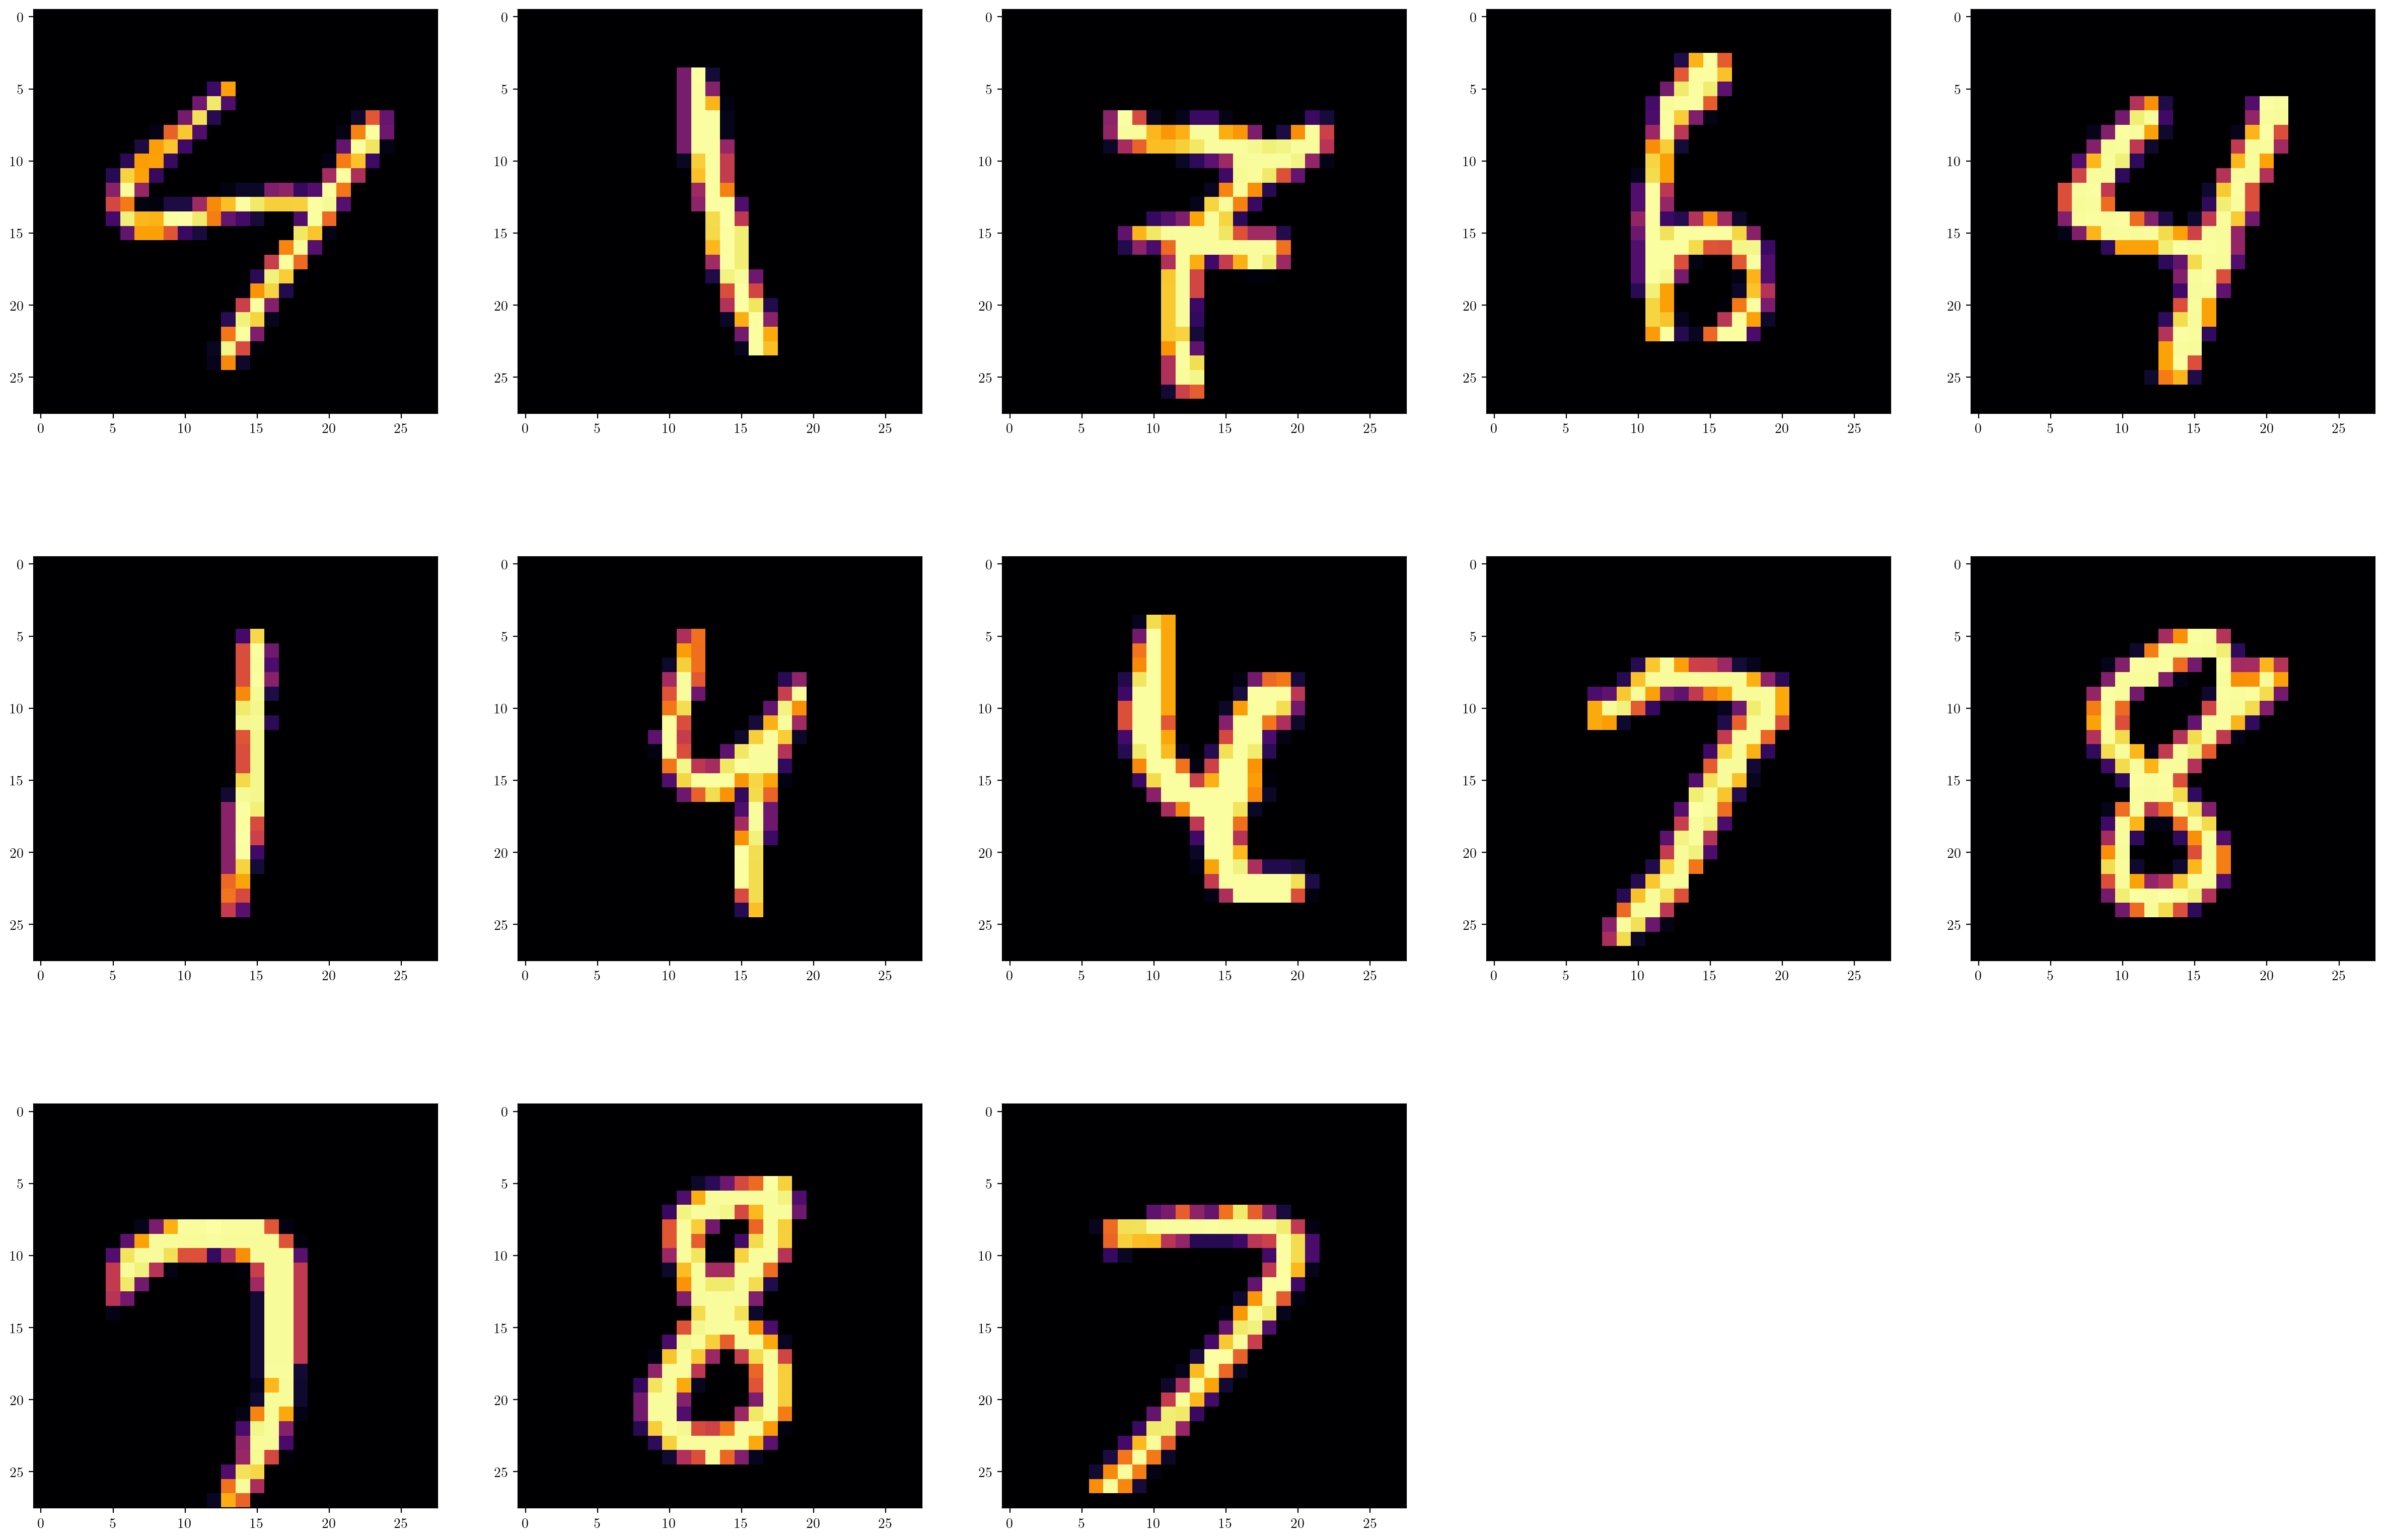

In [233]:
show_images(model.point_clusters[2].reshape(-1, 28, 28), [f"" for i in range(len(model.point_clusters[2]))])

#### Fitting on the entire test data

In [234]:
k = 10
model = SingleLinkageAgglomeration(n_clusters = k)
X = flatten_out(x_test)
model.fit(X)

In [235]:
for idx, elt in enumerate(model.clusters):
    print(f"Cluster {idx} has {len(elt)} points")

Cluster 0 has 9991 points
Cluster 1 has 1 points
Cluster 2 has 1 points
Cluster 3 has 1 points
Cluster 4 has 1 points
Cluster 5 has 1 points
Cluster 6 has 1 points
Cluster 7 has 1 points
Cluster 8 has 1 points
Cluster 9 has 1 points


In [236]:
print(model.clusters)
print(model.labels)

[[0, 494, 4800, 1784, 1799, 9340, 1919, 3973, 9314, 7650, 1925, 9270, 2187, 7082, 9288, 9806, 3079, 5485, 3993, 8134, 6825, 5277, 2563, 2567, 6586, 7654, 4991, 8688, 8791, 1564, 263, 4970, 5540, 6837, 1321, 6805, 746, 6852, 3719, 4913, 6874, 4459, 7677, 229, 4493, 2252, 2646, 2591, 2887, 5402, 5798, 2262, 8591, 2275, 8654, 7180, 254, 6845, 941, 6316, 2844, 2967, 1576, 705, 6871, 1705, 3637, 8742, 8727, 9859, 8749, 1699, 383, 4295, 666, 2463, 3040, 9864, 9935, 9816, 7307, 9837, 5234, 6267, 1624, 3632, 3162, 1710, 4612, 9869, 1935, 4049, 6856, 9448, 6361, 7632, 5326, 8874, 9101, 8871, 5482, 1346, 3400, 9851, 4784, 6960, 6963, 7355, 4624, 4669, 438, 2399, 6830, 5162, 585, 8608, 6253, 1359, 2301, 9823, 2059, 4561, 911, 3643, 2238, 5563, 9990, 4773, 4677, 7021, 8421, 5324, 2290, 1563, 2234, 1171, 2141, 3609, 8617, 8638, 8651, 4568, 9413, 7276, 5789, 1006, 4760, 411, 1507, 4028, 1071, 6198, 7286, 7296, 6223, 7300, 3736, 1175, 2132, 946, 223, 1770, 2490, 5040, 4061, 7605, 8074, 3009, 7493, 99

In [237]:
rand_score(model.labels, y_test)

0.1017039703970397

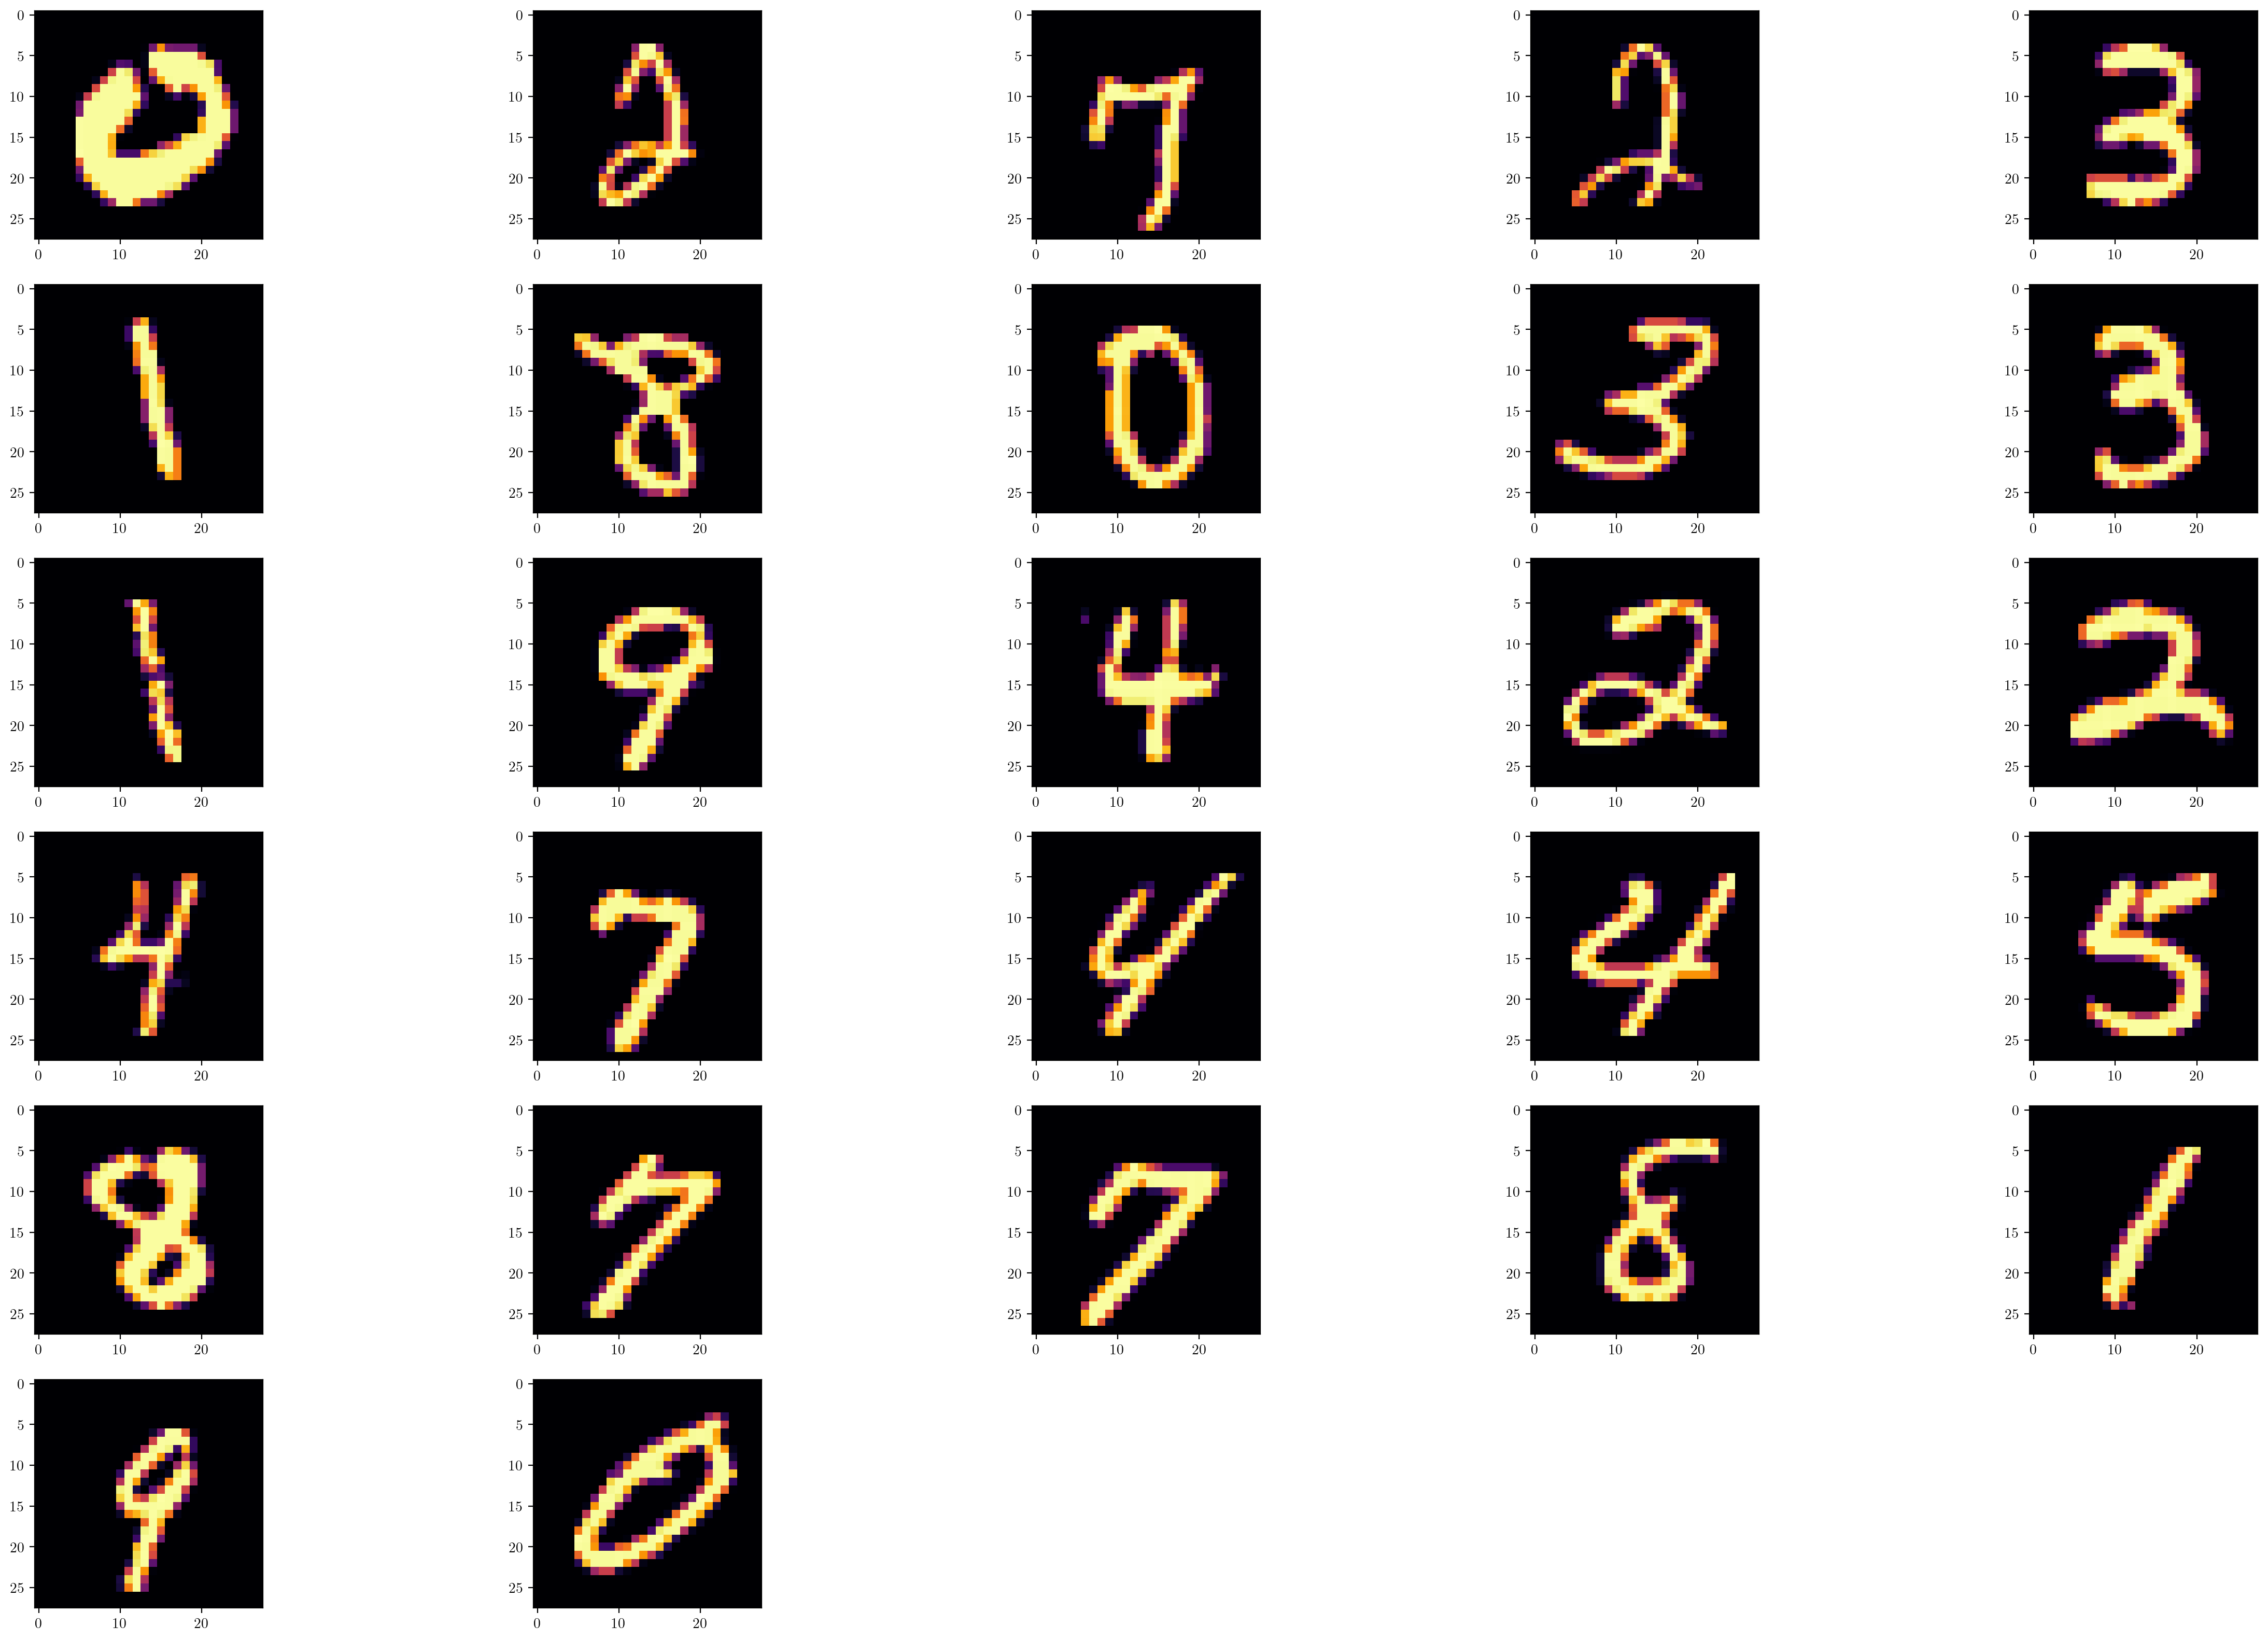

In [76]:
show_images(model.point_clusters[1].reshape(-1, 28, 28), [f"" for i in range(len(model.point_clusters[1]))])

### Intuition behind the ```fit()``` method above
#### Source: [Wikipedia](https://en.wikipedia.org/wiki/Single-linkage_clustering)
#### Source: [Revoledu](https://people.revoledu.com/kardi/tutorial/Clustering/Numerical%20Example.htm)

In [166]:
ids = [[x] for x in range(6)]

# # Example 1
# D = np.array([[0, 17, 21, 31, 23],
#           [17, 0, 30, 34, 21],
#           [21, 30, 0, 28, 39],
#           [31, 34, 28, 0, 43],
#           [23, 21, 39, 43, 0]], dtype = float)

# Example 2
D = np.array([[0, 0.71, 5.66, 3.61, 4.24, 3.20],
          [0.71, 0, 4.95, 2.92, 3.54, 2.50],
          [5.66, 4.95, 0, 2.24, 1.41, 2.50],
          [3.61, 2.92, 2.24, 0, 1.00, 0.50],
          [4.24, 3.54, 1.41, 1.00, 0, 1.12],
          [3.20, 2.50, 2.50, 0.50, 1.12, 0.00]], dtype = float)


for i in range(5):
    print(f"Iteration {i}:")

    D_argmin = D.copy()
    np.fill_diagonal(D_argmin, np.inf)
    D_argmin[np.triu_indices(D.shape[0])] = np.inf

    print(f"Original Distance Matrix:\n{D}")


    row, col = np.unravel_index(np.argmin(D_argmin), D.shape)
    merged_column = np.minimum(D[:, row], D[:, col])

    merged_column = np.delete(merged_column, row)
    print(f"Merged Column: {merged_column}")
    print(f"(Row, Col) = {row}, {col}")
    
    row, col = sorted([row, col])
    
    

    deleted_D = np.delete(np.delete(D, col, axis = 0), col, axis = 1)
    deleted_D[row] = merged_column
    deleted_D[:, row] = merged_column

    print()
    print(f"New Distance Matrix:\n{deleted_D}")

   
    print(f"Original Clusters: {ids}")


    ids[row].extend(ids[col])
    ids.pop(col)
    print(f"\nNew Clusters: {ids}\n\n")
    D = deleted_D.copy()


Iteration 0:
Original Distance Matrix:
[[0.   0.71 5.66 3.61 4.24 3.2 ]
 [0.71 0.   4.95 2.92 3.54 2.5 ]
 [5.66 4.95 0.   2.24 1.41 2.5 ]
 [3.61 2.92 2.24 0.   1.   0.5 ]
 [4.24 3.54 1.41 1.   0.   1.12]
 [3.2  2.5  2.5  0.5  1.12 0.  ]]
Merged Column: [3.2  2.5  2.24 0.   1.  ]
(Row, Col) = 5, 3

New Distance Matrix:
[[0.   0.71 5.66 3.2  4.24]
 [0.71 0.   4.95 2.5  3.54]
 [5.66 4.95 0.   2.24 1.41]
 [3.2  2.5  2.24 0.   1.  ]
 [4.24 3.54 1.41 1.   0.  ]]
Original Clusters: [[0], [1], [2], [3], [4], [5]]

New Clusters: [[0], [1], [2], [3, 5], [4]]


Iteration 1:
Original Distance Matrix:
[[0.   0.71 5.66 3.2  4.24]
 [0.71 0.   4.95 2.5  3.54]
 [5.66 4.95 0.   2.24 1.41]
 [3.2  2.5  2.24 0.   1.  ]
 [4.24 3.54 1.41 1.   0.  ]]
Merged Column: [0.   4.95 2.5  3.54]
(Row, Col) = 1, 0

New Distance Matrix:
[[0.   4.95 2.5  3.54]
 [4.95 0.   2.24 1.41]
 [2.5  2.24 0.   1.  ]
 [3.54 1.41 1.   0.  ]]
Original Clusters: [[0], [1], [2], [3, 5], [4]]

New Clusters: [[0, 1], [2], [3, 5], [4]]


I

## Utility of Single Linkage Clustering over KMeans

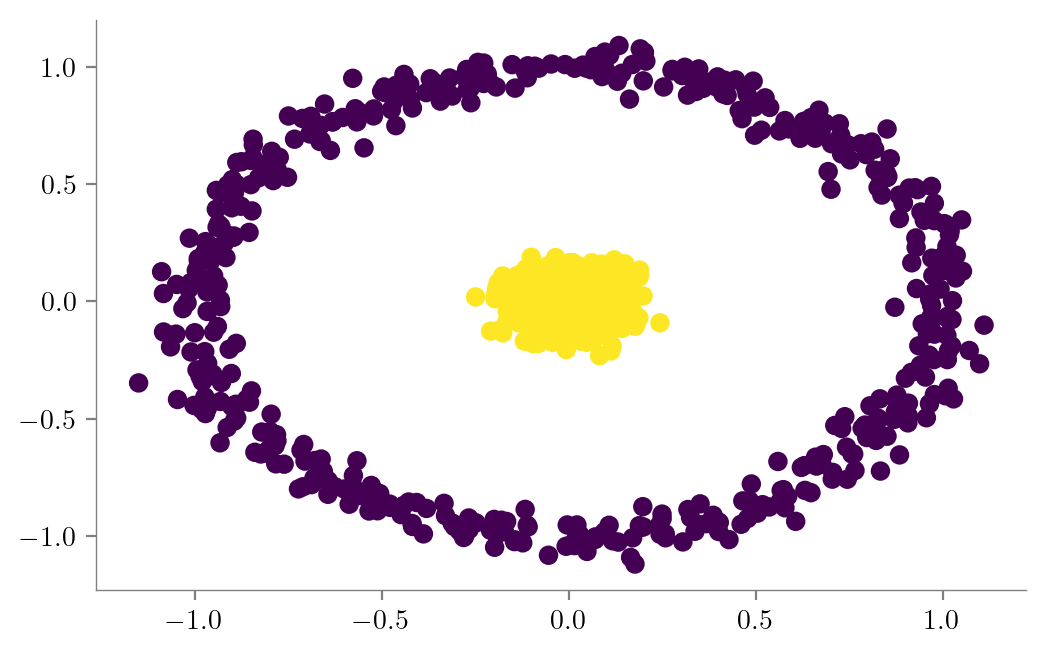

In [220]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, noise = 0.05, factor = 0.1)
latexify(columns = 2, fig_width = 6)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "viridis")
format_axes(plt.gca())
plt.show()

In [202]:
X.shape, y.shape

((1000, 2), (1000,))

## KMeans on the above dataset

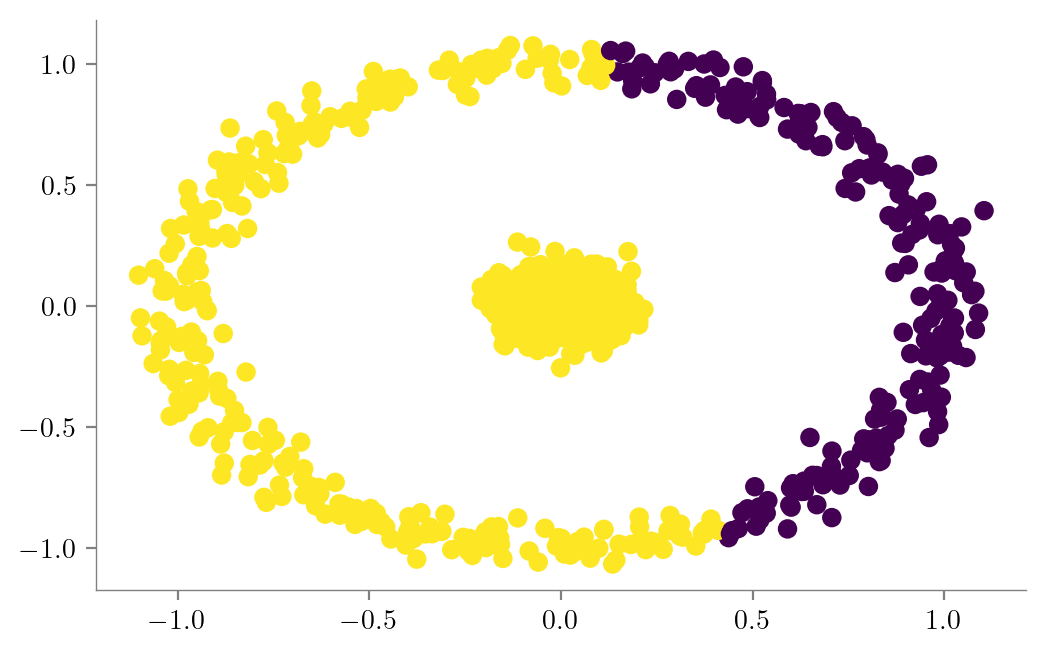

In [203]:
k = 2
model = KMeansPP(n_clusters = k, max_iter = 20, tol = 1e-4)
model.fit(X)
latexify(columns = 2, fig_width = 6)
plt.scatter(X[:, 0], X[:, 1], c = model.labels, cmap = "viridis")
format_axes(plt.gca())
plt.show()

## KCenter on the above dataset

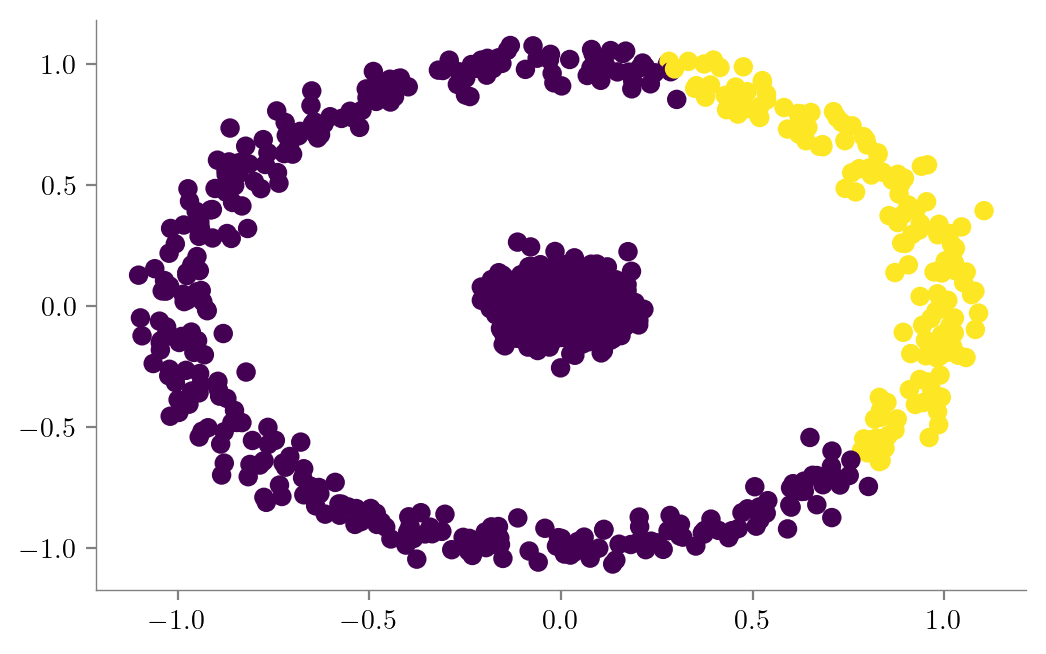

In [204]:
k = 2
model = KCenter(k = k)
model.fit(X)
latexify(columns = 2, fig_width = 6)
plt.scatter(X[:, 0], X[:, 1], c = model.labels, cmap = "viridis")
format_axes(plt.gca())
plt.show()

## Single Linkage Clustering on the above dataset

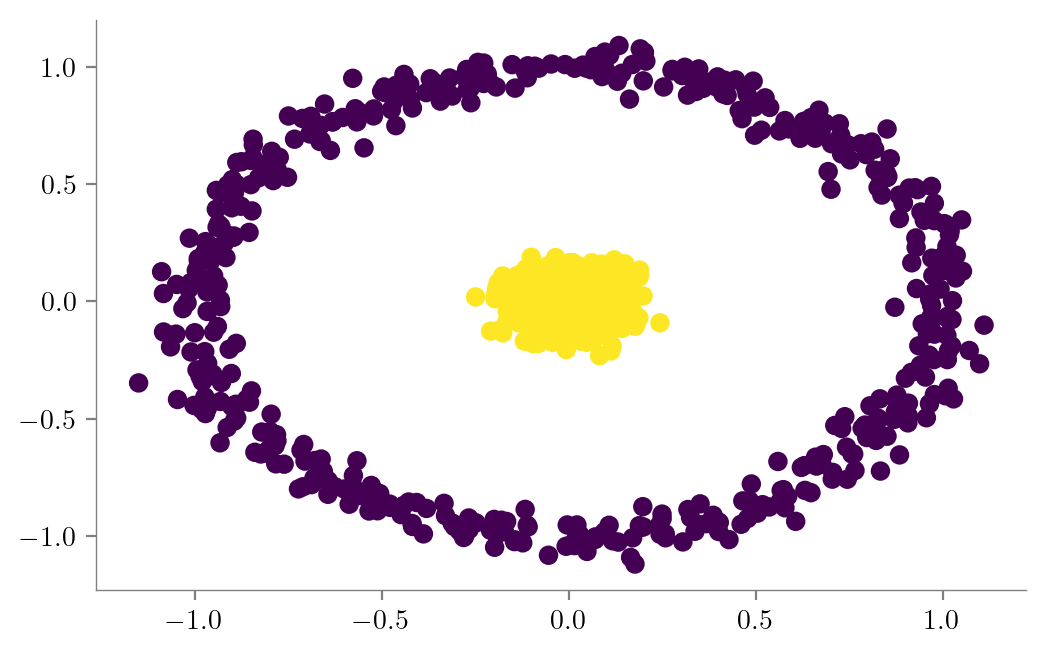

In [221]:
k = 2
model = SingleLinkageAgglomeration(n_clusters = k)
model.fit(X)
latexify(columns = 2, fig_width = 6)
plt.scatter(X[:, 0], X[:, 1], c = model.labels, cmap = "viridis")
format_axes(plt.gca())
plt.show()

In [222]:
len(model.clusters[0])

500

# Q4. Densest Subgraph Greedy Algorithm

In [3]:
import copy
df_nodes = pd.read_csv("./facebook_large/musae_facebook_target.csv")
df_edges = pd.read_csv("./facebook_large/musae_facebook_edges.csv")
df_nodes

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician
...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician
22466,22466,1651527995097082,dubdub Stories,company
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government
22468,22468,175067819212798,Tottus Perú,company


In [4]:
df_edges

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829
...,...,...
170997,20188,20188
170998,22340,22383
170999,22348,22348
171000,5563,5563


In [5]:
df_nodes["page_type"].value_counts()

page_type
government    6880
company       6495
politician    5768
tvshow        3327
Name: count, dtype: int64

### Adjacency List of the Graph

In [42]:
from collections import defaultdict
V, E = df_nodes.shape[0], df_edges.shape[0]
Adj = defaultdict(list)
for i in df_edges.index:
    u, v = df_edges.loc[i, "id_1"], df_edges.loc[i, "id_2"]
    Adj[u].append(v)
    Adj[v].append(u)

### $\underset{v \in V}{\operatorname{\sum}} \text{deg}(v) = 2 |E|$

In [7]:
degree_sum = 0
for node in Adj:
    degree_sum += len(Adj[node])
degree_sum

342004

#### $\text{density} = \dfrac{|e(S, \overline{S})|}{|S|}$

In [8]:
def density(Adj):
    E, V = 0, len(Adj)
    for node in Adj:
        E += len(Adj[node])
    return E / (2 * V), E//2, V

#### Finding the Least Degree Vertex

In [9]:
def least_degree_elt(Adj):
    least_degree, idx = float("inf"), -1
    for node in Adj:
        if len(Adj[node]) == 0:
            return least_degree, node
        
        if (len(Adj[node]) < least_degree):
            least_degree = len(Adj[node])
            idx = node
        
    return least_degree, idx

In [10]:
node, id = least_degree_elt(Adj)
print(node, id, Adj[id])

1 0 [18427]


In [11]:
print(density(Adj))

(7.610235870048954, 171002, 22470)


#### Finding the Densest Subgraph using the Greedy Algorithm

In [12]:
def greedy_densest_subgraph(Adj):
    densities, subgraphs, VE = [], [], []
    while (len(Adj) > 1):
        subgraph_density, E, V = density(Adj)
        densities.append(subgraph_density)
        least_degree, id = least_degree_elt(Adj)
        del Adj[id]
        for node in Adj:
            if (id in Adj[node]):
                Adj[node].remove(id)
        subgraphs.append(Adj.copy())
        VE.append(f"{E} / {V}")
    return densities, subgraphs, VE

In [13]:
AdjNew = copy.deepcopy(Adj)
densities, subgraphs, VE = greedy_densest_subgraph(AdjNew)

#### Densities of the SubGraphs obtained by the Greedy Algorithm

In [14]:
print(densities)
print(VE)

[7.610235870048954, 7.610530063643242, 7.610824283425316, 7.611118529398674, 7.611412801566812, 7.61170709993323, 7.6120014245014245, 7.612295775274896, 7.6125901522571455, 7.6128845554516715, 7.613178984861976, 7.613473440491562, 7.613767922343931, 7.614062430422585, 7.614356964731029, 7.614651525272768, 7.614946112051305, 7.615240725070146, 7.615535364332799, 7.615830029842769, 7.616124721603564, 7.616419439618691, 7.616714183891661, 7.617008954425981, 7.617303751225163, 7.617598574292716, 7.617893423632151, 7.618188299246981, 7.618483201140719, 7.618778129316875, 7.619073083778966, 7.619368064530505, 7.619663071575006, 7.619958104915987, 7.620253164556962, 7.620548250501448, 7.620843362752964, 7.621138501315027, 7.621433666191155, 7.621728857384869, 7.622024074899688, 7.622319318739132, 7.622614588906724, 7.622909885405984, 7.623205208240435, 7.6235005574136006, 7.623795932929005, 7.624091334790171, 7.624386763000625, 7.624682217563891, 7.624977698483497, 7.625273205762969, 7.625568

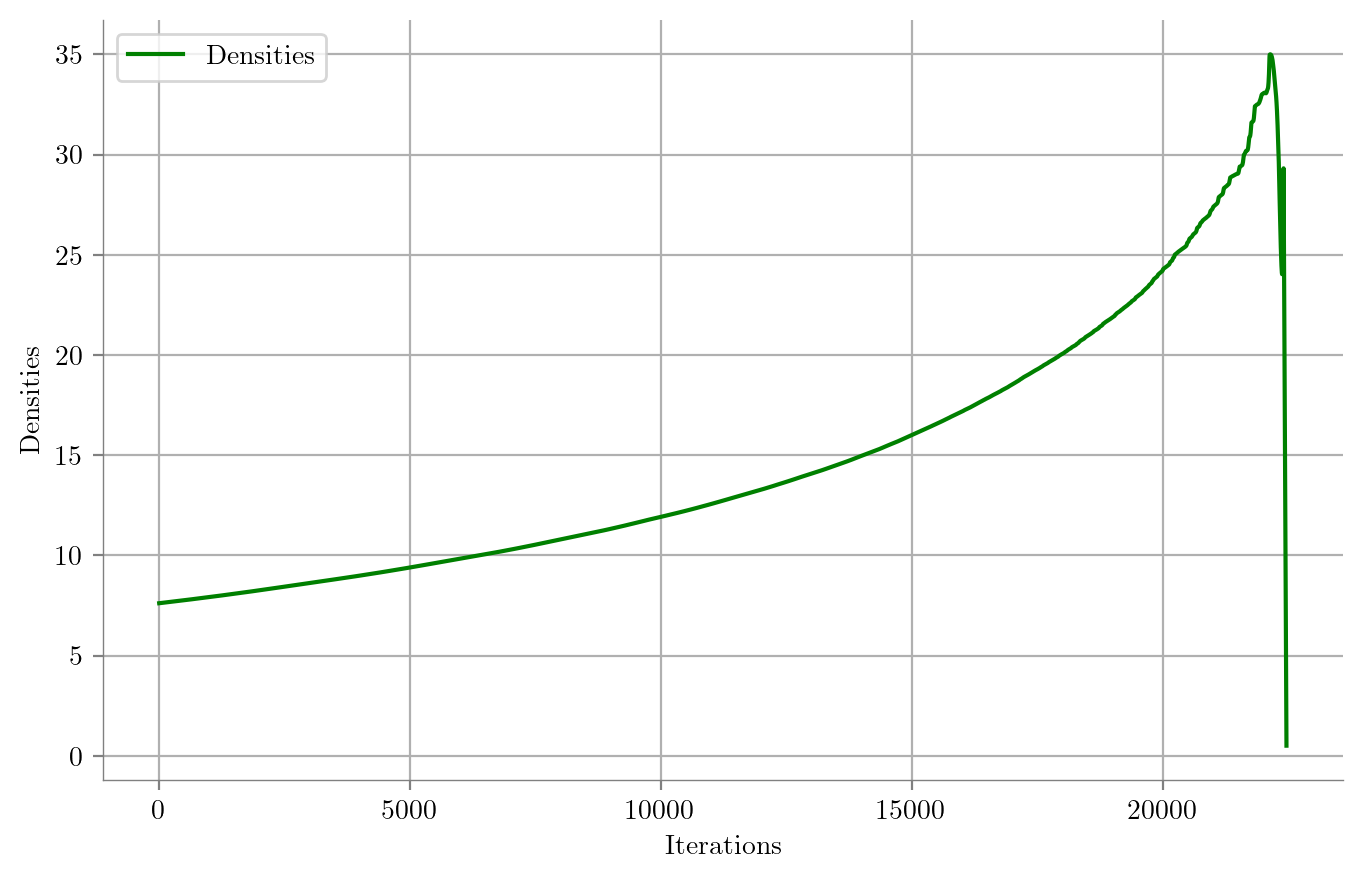

In [15]:
latexify(columns = 2, fig_width = 8)
plt.plot(densities, label = "Densities", color = "green")
plt.xlabel("Iterations")
plt.ylabel("Densities")
plt.legend()
plt.grid()
format_axes(plt.gca())
plt.show()

#### The 10 Densest SubGraphs

In [16]:
densities = np.array(densities)
sorted_idx = np.argsort(densities)[::-1][:10]
print(sorted_idx)
print(densities[sorted_idx])
print(subgraphs[sorted_idx[0]])

[22149 22148 22147 22146 22145 22144 22143 22151 22150 22142]
[35.00623053 35.00621118 35.00619195 35.00617284 35.00615385 35.00613497
 35.00611621 35.0031348  35.003125   35.00304878]
defaultdict(<class 'list'>, {22265: [961, 983, 1271, 1387, 1654, 2442, 2773, 4502, 5432, 5458, 6441, 7467, 8139, 8869, 9125, 9220, 9525, 17726, 11323, 15174, 12408, 20892, 14497, 15236, 17402, 10426, 20276, 18966, 16895, 6045], 10379: [1271, 1387, 1654, 2245, 2284, 2942, 3073, 3097, 11775, 3805, 4097, 4399, 5432, 5458, 6441, 7467, 8139, 9220, 11364, 11432, 22265, 11538, 11804, 12088, 6045, 14497, 14996, 15096, 15174, 10426, 16093, 16122, 16791, 16977, 21729, 19743, 18216, 20700, 19870, 19347], 19743: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502, 5458, 21231, 6441, 7467, 8139, 8232, 8869, 8883, 9220, 9294, 9319, 9525, 11323, 11538, 11644, 11804, 6045, 12464, 14497, 15174, 10426, 15531, 15951, 15963, 16895, 16977, 17384, 17984, 21496, 20343], 21729: [754, 961, 983, 1271, 1387, 1654, 2311, 2773

#### Function to Peel off the Densest SubGraph from the given Graph

In [17]:
def peel_off_subgraph(original_adjacency_list, subgraph_adjacency_list):
    new_adjacency_list = {node: copy.deepcopy(neighbors) for node, neighbors in original_adjacency_list.items()}

    for node in subgraph_adjacency_list:
        if node in new_adjacency_list:
            del new_adjacency_list[node]

    updated_adjacency_list = {}
    for node, neighbors in new_adjacency_list.items():
        updated_adjacency_list[node] = [neighbor for neighbor in neighbors if neighbor not in subgraph_adjacency_list]

    return updated_adjacency_list

#### The Graph
![](Graph.png)

#### Densest Subgraph
![](DenseGraph.png)

#### Example Implementation

In [18]:
AdjEx = { 1: [2],
          2: [1, 3, 4, 6, 9],
          3: [2, 5, 6, 9],
          4: [2, 5],
          5: [3, 4, 7],
          6: [2, 3, 7, 9],
          7: [5, 6, 8],
          8: [7],
          9: [2, 3, 6]}

densitiesEx, subgraphsEx, VEEx = greedy_densest_subgraph(AdjEx.copy())
print(f"Densities in each iteration:\n{densitiesEx}")
densitiesEx = np.array(densitiesEx)
print(VEEx)
print("\nThe Subgraphs in each iteration:")
print(subgraphsEx)
print("\nThe Densest Subgraph:")
print(subgraphsEx[np.argmax(densitiesEx)])
print("\nThe Graph after Peeling off the densest subgraph:")
print(peel_off_subgraph(AdjEx.copy(), subgraphsEx[np.argmax(densitiesEx)].copy()))

Densities in each iteration:
[1.4444444444444444, 1.5, 1.5714285714285714, 1.5, 1.4, 1.5, 1.0, 0.5]
['13 / 9', '12 / 8', '11 / 7', '9 / 6', '7 / 5', '6 / 4', '3 / 3', '1 / 2']

The Subgraphs in each iteration:
[{2: [3, 6, 9], 3: [6, 9], 4: [2, 5], 5: [3, 7], 6: [9], 7: [6], 8: [7], 9: []}, {2: [3, 6, 9], 3: [6, 9], 4: [2, 5], 5: [3, 7], 6: [9], 7: [6], 9: []}, {2: [3, 6, 9], 3: [6, 9], 5: [3, 7], 6: [9], 7: [6], 9: []}, {2: [3, 6, 9], 3: [6, 9], 6: [9], 7: [6], 9: []}, {2: [3, 6, 9], 3: [6, 9], 6: [9], 9: []}, {3: [6, 9], 6: [9], 9: []}, {6: [9], 9: []}, {9: []}]

The Densest Subgraph:
{2: [3, 6, 9], 3: [6, 9], 5: [3, 7], 6: [9], 7: [6], 9: []}

The Graph after Peeling off the densest subgraph:
{1: [], 4: [], 8: []}


#### Iteratively we'll find the densest subgraph in the current graph then peel off the densest subgraph from the current graph and find the densest subgraph in the remaining graph, repeating untill 5 such times or untill the remaining graph becomes fully **disconnected**.

In [20]:
max_densities, densest_subgraphs, max_VE = [], [], []
graphs = [Adj]
for i in range(5):
    graphN = copy.deepcopy(graphs[i])
    densitiesN, subgraphsN, VEN = greedy_densest_subgraph(graphN)
    densitiesN = np.array(densitiesN)
    if not len(densitiesN):
        break
    
    max_density, max_density_idx = np.max(densitiesN), np.argmax(densitiesN)
    
    max_densities.append(max_density)
    densest_subgraphs.append(subgraphsN[max_density_idx])
    max_VE.append(VEN[max_density_idx])
    
    graphs.append(peel_off_subgraph(graphs[i].copy(), subgraphsN[max_density_idx].copy()))

#### Densities of the iteratively Peeled Out SubGraphs

In [22]:
print(max_densities)
print(max_VE)
print(densest_subgraphs)
print(len(densest_subgraphs[0]), len(densest_subgraphs[1]), len(densest_subgraphs[2]), len(densest_subgraphs[3]), len(densest_subgraphs[4]))

[35.006230529595015, 25.42222222222222, 20.429378531073446, 16.980392156862745, 15.983935742971887]
['11237 / 321', '2288 / 90', '14464 / 708', '866 / 51', '3980 / 249']
[defaultdict(<class 'list'>, {22265: [961, 983, 1271, 1387, 1654, 2442, 2773, 4502, 5432, 5458, 6441, 7467, 8139, 8869, 9125, 9220, 9525, 17726, 11323, 15174, 12408, 20892, 14497, 15236, 17402, 10426, 20276, 18966, 16895, 6045], 10379: [1271, 1387, 1654, 2245, 2284, 2942, 3073, 3097, 11775, 3805, 4097, 4399, 5432, 5458, 6441, 7467, 8139, 9220, 11364, 11432, 22265, 11538, 11804, 12088, 6045, 14497, 14996, 15096, 15174, 10426, 16093, 16122, 16791, 16977, 21729, 19743, 18216, 20700, 19870, 19347], 19743: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502, 5458, 21231, 6441, 7467, 8139, 8232, 8869, 8883, 9220, 9294, 9319, 9525, 11323, 11538, 11644, 11804, 6045, 12464, 14497, 15174, 10426, 15531, 15951, 15963, 16895, 16977, 17384, 17984, 21496, 20343], 21729: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502,

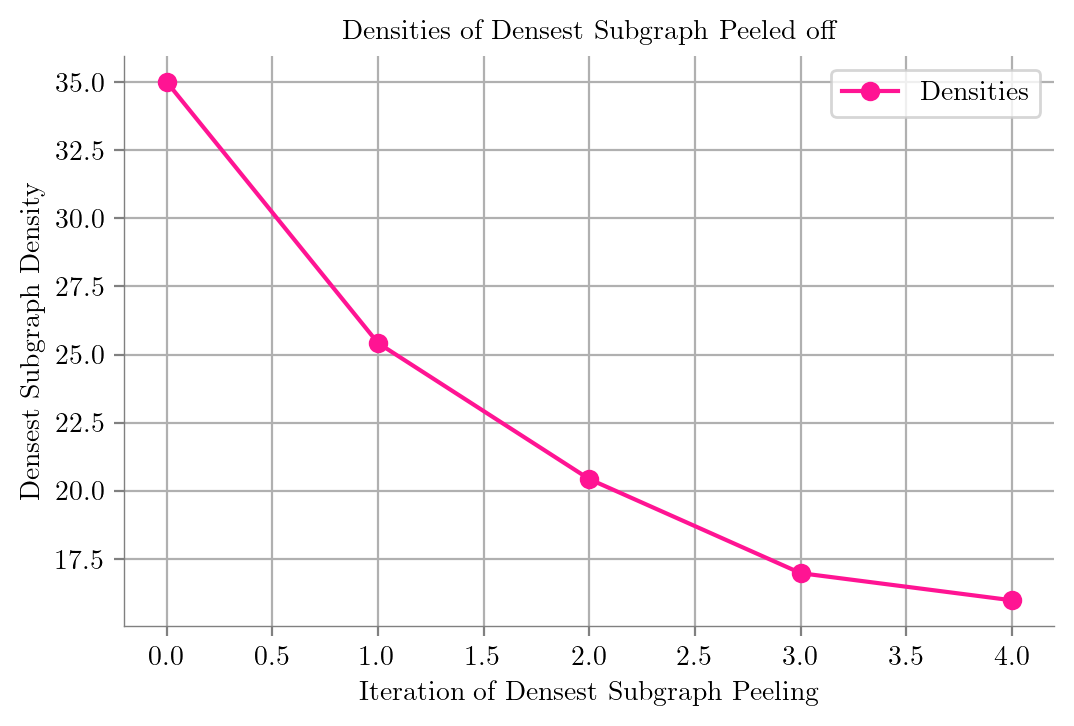

In [24]:
latexify(columns = 2, fig_width = 6)
plt.plot(max_densities, label = "Densities", color = "deeppink", marker = "o")
plt.title(f"Densities of Densest Subgraph Peeled off")
plt.xlabel("Iteration of Densest Subgraph Peeling")
plt.ylabel("Densest Subgraph Density")
plt.legend()
plt.grid()
format_axes(plt.gca())
plt.show()

#### Entropy of these 5 Densest SubGraphs based upon labels - ```df_nodes["page_type"]```

In [25]:
from scipy.special import xlogy
def entropy(probabilities):
    return -np.sum(xlogy(probabilities, probabilities)/np.log(2))

for idx, dsg in enumerate(densest_subgraphs):
    labels = df_nodes["page_type"][dsg.keys()]
    probs = labels.value_counts(normalize = True)
    print(f"Value Counts of the Labels in the Densest Subgraph {idx + 1}:")
    print(labels.value_counts())
    print(f"Entropy of the Densest Subgraph {idx + 1}:")
    print(entropy(probs))
    print()

Value Counts of the Labels in the Densest Subgraph 1:
page_type
government    256
tvshow         60
company         4
Name: count, dtype: int64
Entropy of the Densest Subgraph 1:
0.789386108210765

Value Counts of the Labels in the Densest Subgraph 2:
page_type
government    82
politician     7
Name: count, dtype: int64
Entropy of the Densest Subgraph 2:
0.3974104103699248

Value Counts of the Labels in the Densest Subgraph 3:
page_type
government    470
politician    196
tvshow         38
company         3
Name: count, dtype: int64
Entropy of the Densest Subgraph 3:
1.1648277522702892

Value Counts of the Labels in the Densest Subgraph 4:
page_type
government    50
Name: count, dtype: int64
Entropy of the Densest Subgraph 4:
-0.0

Value Counts of the Labels in the Densest Subgraph 5:
page_type
politician    172
government     76
Name: count, dtype: int64
Entropy of the Densest Subgraph 5:
0.8890349038123859



#### The 5 Densest SubGraphs

In [47]:
print(densest_subgraphs[0])
print(densest_subgraphs[1])
print(densest_subgraphs[2])
print(densest_subgraphs[3])
print(densest_subgraphs[4])

defaultdict(<class 'list'>, {22265: [961, 983, 1271, 1387, 1654, 2442, 2773, 4502, 5432, 5458, 6441, 7467, 8139, 8869, 9125, 9220, 9525, 17726, 11323, 15174, 12408, 20892, 14497, 15236, 17402, 10426, 20276, 18966, 16895, 6045], 10379: [1271, 1387, 1654, 2245, 2284, 2942, 3073, 3097, 11775, 3805, 4097, 4399, 5432, 5458, 6441, 7467, 8139, 9220, 11364, 11432, 22265, 11538, 11804, 12088, 6045, 14497, 14996, 15096, 15174, 10426, 16093, 16122, 16791, 16977, 21729, 19743, 18216, 20700, 19870, 19347], 19743: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502, 5458, 21231, 6441, 7467, 8139, 8232, 8869, 8883, 9220, 9294, 9319, 9525, 11323, 11538, 11644, 11804, 6045, 12464, 14497, 15174, 10426, 15531, 15951, 15963, 16895, 16977, 17384, 17984, 21496, 20343], 21729: [754, 961, 983, 1271, 1387, 1654, 2311, 2773, 11775, 4502, 5458, 21231, 6441, 7467, 8139, 8232, 8869, 8883, 9220, 9294, 9319, 9525, 11323, 11538, 11644, 11804, 6045, 12464, 14497, 15174, 10426, 15531, 15951, 15963, 16895, 16977, 

### Displaying the Graphs!

In [39]:
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

In [114]:
color_lit = {"government" : ["red", "Govt."], "politician" : ["blue", "Pol."], "tvshow" : ["green", "TV"], "company" : ["deeppink", "Comp."]}
def display_graph(adjacency_list, filename):
    G = Network(height = "1080px", width = '100%', directed = False, notebook = True, cdn_resources = "remote")
    
    for node, neighbors in adjacency_list.items():
        G.add_node(str(node), label=str(color_lit[df_nodes["page_type"][node]][1]) + " " + str(node), shape = "dot", color = color_lit[df_nodes["page_type"][node]][0], size = 7, labelHighlightBold = True)

    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(str(node), str(neighbor), color = "#808080", width = 0.2)
    
    G.toggle_physics(False)
    G.toggle_stabilization(True)
    G.barnes_hut()
    G.show(filename)

In [116]:
display_graph(densest_subgraphs[0], "DSG1.html")
display_graph(densest_subgraphs[1], "DSG2.html")
display_graph(densest_subgraphs[2], "DSG3.html")
display_graph(densest_subgraphs[3], "DSG4.html")
display_graph(densest_subgraphs[4], "DSG5.html")

DSG1.html
DSG2.html
DSG3.html
DSG4.html
DSG5.html


### Densest SubGraph 1
![Graph1](1.gif)

### Densest SubGraph 2
![Graph2](2.gif)

### Densest SubGraph 3
![Graph3](3.gif)

### Densest SubGraph 4
![Graph4](4.gif)

### Densest SubGraph 5
![Graph5](5.gif)